

__Título TFM: Modelos de Aprendizaje Automático para procesos de auditoría contables__

__Alumna: Alba Mena Vera__

__Variable objetivo : Grupo de gastos __

#Introducción

La BBDD ha sido obtenido de la página web de datos del Gobierno de España.

La plataforma datos.gob.es se constituye como el punto de encuentro entre las administraciones, las empresas y los ciudadanos interesados en la apertura de la información pública y en el desarrollo de servicios avanzados basados en datos.

Datos.gob.es permite la interacción del visitante y ofrece visibilidad a las actuaciones que se realizan en el marco de la Iniciativa Aporta, la estrategia de datos abiertos de España.

Datos.gob.es que organiza y gestiona el Catálogo de Información Pública del sector público. Asimismo, desde la plataforma proporciona información general, materiales formativos y noticias de actualidad sobre la reutilización de la información del sector público.

El conjunto de datos que voy a utilizar es la Facturación de CTPDA de Andalucia y su grupo de gastos como variable objetivo clasificadora.


# Conocimiento y limpieza del dataset:

## Librerías necesarias

In [5]:
# Importamos paquetes que pueden sernos de utilidad
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# machine learning 

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Import models from scikit learn module:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE,chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV,MultiTaskLassoCV
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2, f_classif

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.stem import PorterStemmer
nltk.download('stopwords')

from sklearn.utils import resample,shuffle
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/albamena/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


Link a la base de datos
https://www.juntadeandalucia.es/datosabiertos/portal/dataset/facturacion

In [8]:
from nltk.corpus import stopwords

## Lectura de la fuente de datos

In [10]:
df=pd.read_excel('facturacion-may-24u.xlsx')

Se leen las primeras 5 líneas del dataset para dar una visión general de su contenido:

In [12]:
df

,Fecha Entrada Registro,Importe Total,GRUPO DE GASTOS,SUBGRUPO,Denominación Factura,Denominación Acreedor
0,2019-01-10,0.33,COMUNICACIONES,TELEFONÍA-INTERNET,LOTE 5 VOZ FIJA SEPTIEMBR,TELEFONICA DE ESPAÑA SAU TELEFONICA
1,2021-02-03,1.00,VEHÍCULO OFICIAL,"COMBUSTIBLE,LAVADOS Y OTROS",LAVADOS ENERO 21,SOLRED SA
2,2023-06-26,1.00,ACTIVIDAD DEL CONSEJO,PROTOCOLO,"COMISION ENTE, C, PROTOC,",EXCMO CABILDO DE LA S M Y P I CATED
3,2016-09-08,1.17,COMUNICACIONES,TELEFONÍA-INTERNET,LOTE 9 AC INTERN 2 MARZO,TELEFONICA DE ESPAÑA SAU TELEFONICA
4,2016-09-08,1.17,COMUNICACIONES,TELEFONÍA-INTERNET,LOTE 9 AC INTERN 2 ABRIL,TELEFONICA DE ESPAÑA SAU TELEFONICA
...,...,...,...,...,...,...
2699,2020-06-02,9376.87,SEDE,MANTENIMIENTO,"VIG–SEG,CTPDA 1 A 31/05",SECURITY WORLD SA
2700,2021-11-26,9408.57,ACTIVIDAD DEL CONSEJO,MATERIAL INFORMÁTICO Y OFICINA,"CABINA ALMACENAM, SAN","SOLUTIA INNOVAWORLD TECHNOLOGIES, S"
2701,2022-03-02,9519.07,ACTIVIDAD DEL CONSEJO,DOCUMENTACIÓN Y PUBLICACIONES,"RENOV,SUSCRIPBD 2022",EDITORIAL ARANZADI SAU
2702,2021-12-21,9747.51,ACTIVIDAD DEL CONSEJO,PLANES Y PROGRAMAS,"DES, DE SIST,INF, NOV,21",SOLTEL IT SOLUTIONS SLU


Eliminamos los duplicados que pueda haber

In [14]:
df=df.drop_duplicates()
df

,Fecha Entrada Registro,Importe Total,GRUPO DE GASTOS,SUBGRUPO,Denominación Factura,Denominación Acreedor
0,2019-01-10,0.33,COMUNICACIONES,TELEFONÍA-INTERNET,LOTE 5 VOZ FIJA SEPTIEMBR,TELEFONICA DE ESPAÑA SAU TELEFONICA
1,2021-02-03,1.00,VEHÍCULO OFICIAL,"COMBUSTIBLE,LAVADOS Y OTROS",LAVADOS ENERO 21,SOLRED SA
2,2023-06-26,1.00,ACTIVIDAD DEL CONSEJO,PROTOCOLO,"COMISION ENTE, C, PROTOC,",EXCMO CABILDO DE LA S M Y P I CATED
3,2016-09-08,1.17,COMUNICACIONES,TELEFONÍA-INTERNET,LOTE 9 AC INTERN 2 MARZO,TELEFONICA DE ESPAÑA SAU TELEFONICA
4,2016-09-08,1.17,COMUNICACIONES,TELEFONÍA-INTERNET,LOTE 9 AC INTERN 2 ABRIL,TELEFONICA DE ESPAÑA SAU TELEFONICA
...,...,...,...,...,...,...
2699,2020-06-02,9376.87,SEDE,MANTENIMIENTO,"VIG–SEG,CTPDA 1 A 31/05",SECURITY WORLD SA
2700,2021-11-26,9408.57,ACTIVIDAD DEL CONSEJO,MATERIAL INFORMÁTICO Y OFICINA,"CABINA ALMACENAM, SAN","SOLUTIA INNOVAWORLD TECHNOLOGIES, S"
2701,2022-03-02,9519.07,ACTIVIDAD DEL CONSEJO,DOCUMENTACIÓN Y PUBLICACIONES,"RENOV,SUSCRIPBD 2022",EDITORIAL ARANZADI SAU
2702,2021-12-21,9747.51,ACTIVIDAD DEL CONSEJO,PLANES Y PROGRAMAS,"DES, DE SIST,INF, NOV,21",SOLTEL IT SOLUTIONS SLU


Observamos que no hay duplicados

## Tipos de variables y cantidad de instacias

Compruebo los tipos y la cantidad de instancia. De este resultado compruebo que el conjunto de datos tiene **2704  filas o instancias y 6 columnas o variables**:

In [18]:
print(df.shape)

(2704, 6)


También puedo ver que variables son numéricas y cuales categóricas, las numéricas potencialmente no tendré que cambiar nada de ellas. Compruebo los tipos de variables que contiene el dataset con dtypes:

In [20]:
print(df.dtypes)

Fecha Entrada Registro    datetime64[ns]
Importe Total                    float64
GRUPO DE GASTOS                   object
SUBGRUPO                          object
Denominación Factura              object
Denominación Acreedor             object
dtype: object


Esto es otra forma de ver el tipo de variables que tengo, Compruebo de que tipo son mis variables:
object=variables alfanumericas, datetime fecha, entero... Vemos que todas son object

Renombramos las variables para que sea más cómodo

In [23]:
df.rename(columns={'Fecha Entrada Registro':'fecha_entrada_registro',
                        'Importe Total':'importe_total','GRUPO DE GASTOS': 'grupo_gastos','SUBGRUPO':'subgrupo','Denominación Factura':'denominacion_factura','Denominación Acreedor':'denominacion_acreedor'   },
               inplace=True)
df.columns

Index(['fecha_entrada_registro', 'importe_total', 'grupo_gastos', 'subgrupo',
       'denominacion_factura', 'denominacion_acreedor'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha_entrada_registro  2704 non-null   datetime64[ns]
 1   importe_total           2704 non-null   float64       
 2   grupo_gastos            2704 non-null   object        
 3   subgrupo                2704 non-null   object        
 4   denominacion_factura    2704 non-null   object        
 5   denominacion_acreedor   2704 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 126.9+ KB


A continuación veo el número de columnas de mi dataset

In [26]:
df.columns

Index(['fecha_entrada_registro', 'importe_total', 'grupo_gastos', 'subgrupo',
       'denominacion_factura', 'denominacion_acreedor'],
      dtype='object')

In [27]:
df.describe()

,fecha_entrada_registro,importe_total
count,2704,2704.000000
mean,2020-02-09 08:09:56.449704192,4140.458861
min,2016-02-09 00:00:00,-327196.000000
25%,2018-02-19 18:00:00,72.342500
50%,2019-12-18 00:00:00,195.610000
75%,2021-12-16 06:00:00,680.762500
max,2023-12-28 00:00:00,891437.000000
std,NaN,42282.723913


In [28]:
print(df.isnull().sum())

fecha_entrada_registro    0
importe_total             0
grupo_gastos              0
subgrupo                  0
denominacion_factura      0
denominacion_acreedor     0
dtype: int64


### Valores perdidos
Compruebo los valores que son nulos en cada una de las variables del dataset.

#### Missing Data Heatmap
Cuando hay un número menor de características, podemos visualizar los datos que faltan a través del mapa de calor. El siguiente mapa de calor muestra en amarillo los missing values de cada variable.


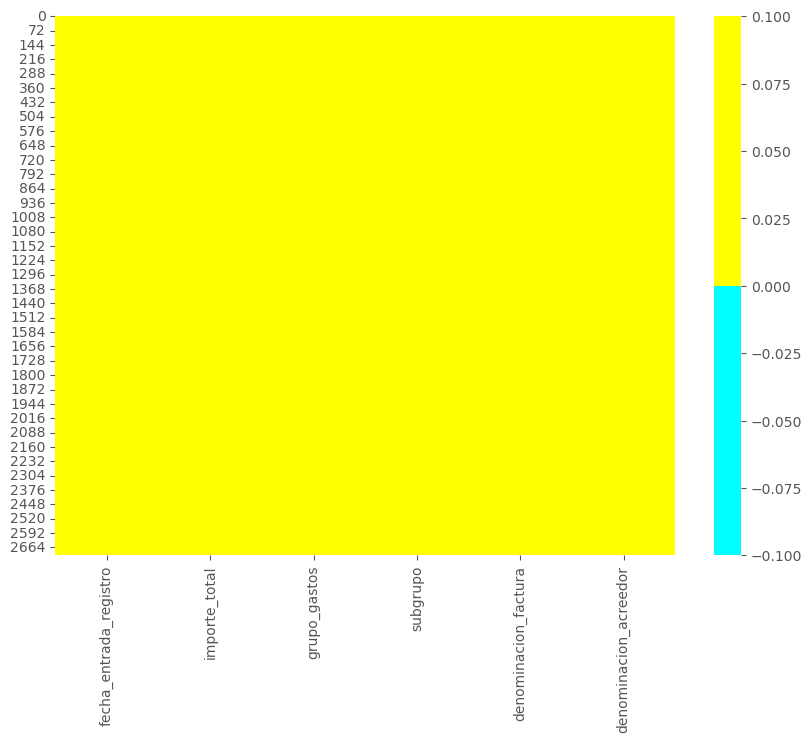

In [31]:
cols = df.columns[:7] # quiero ver todas mis columnas
colours = ['#00FFFF', '#ffff00'] # Especifica el color - amarillo es missing y azul no es missing.
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
plt.savefig('missingheat.png') 

#### Porcentaje de missing values

Observamos que no hay missing values en nuestro data set.

fecha_entrada_registro - 0%
importe_total - 0%
grupo_gastos - 0%
subgrupo - 0%
denominacion_factura - 0%
denominacion_acreedor - 0%


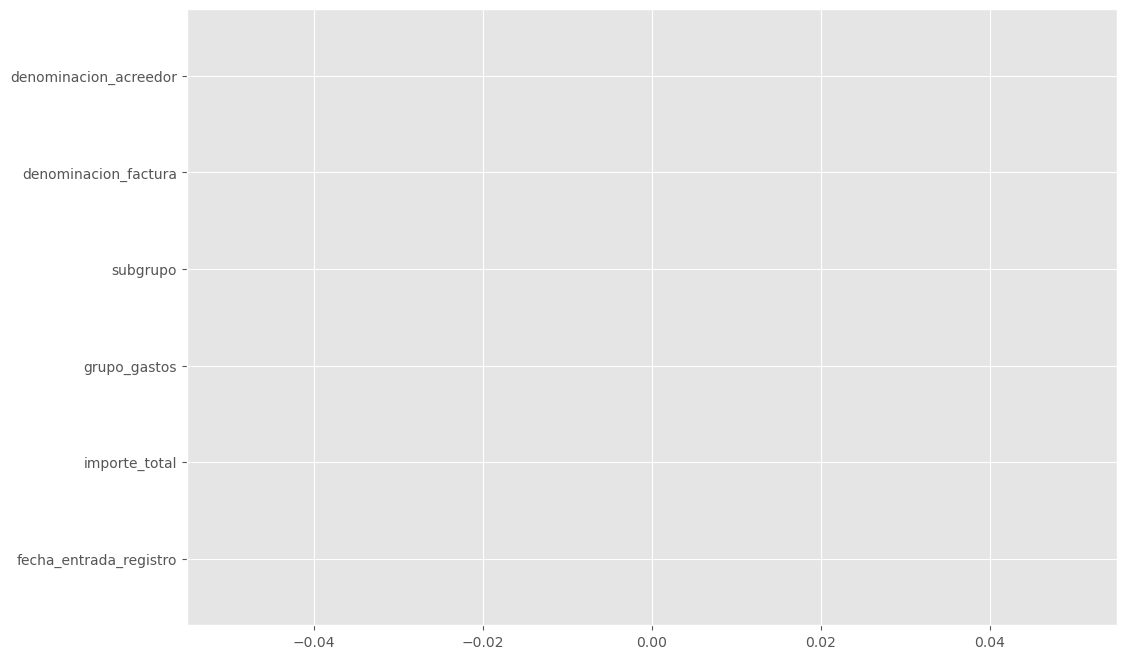

In [33]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    plt.barh(col, round(pct_missing*100))
plt.savefig('Porcentaje_de_missing_values.png') 

### Convertir variables de tipo string a valores numéricas

#### Consolidación de la variable grupo_gastos 

grupo_gastos
COMUNICACIONES                             593
SEDE                                       558
ACTIVIDAD                                  430
ACTIVIDAD DEL CONSEJO                      341
INDEMNIZACIONES POR RAZÓN DEL SERVICIO     335
INDEMNIZACIÓN RAZÓN SERVICIO               138
VEHÍCULO OFICIAL                           113
ENCOMIENDAS                                 85
ENCARGO A MEDIO PROPIO                      49
VEHíCULO OFICIAL                            20
INDEMNIZACIONES POR RAZÓN  DEL SERVICIO     19
ENCOMIENDA                                  11
INDEMNIZACIÓN                                6
MATERIAL INFORMÁTICO Y DE OFICINA            3
VEHÍCULO                                     2
Í                                            1
Name: count, dtype: int64 Index(['COMUNICACIONES', 'SEDE', 'ACTIVIDAD', 'ACTIVIDAD DEL CONSEJO',
       'INDEMNIZACIONES POR RAZÓN DEL SERVICIO',
       'INDEMNIZACIÓN RAZÓN SERVICIO', 'VEHÍCULO OFICIAL', 'ENCOMIENDAS',
       'ENCARGO

<Axes: ylabel='grupo_gastos'>

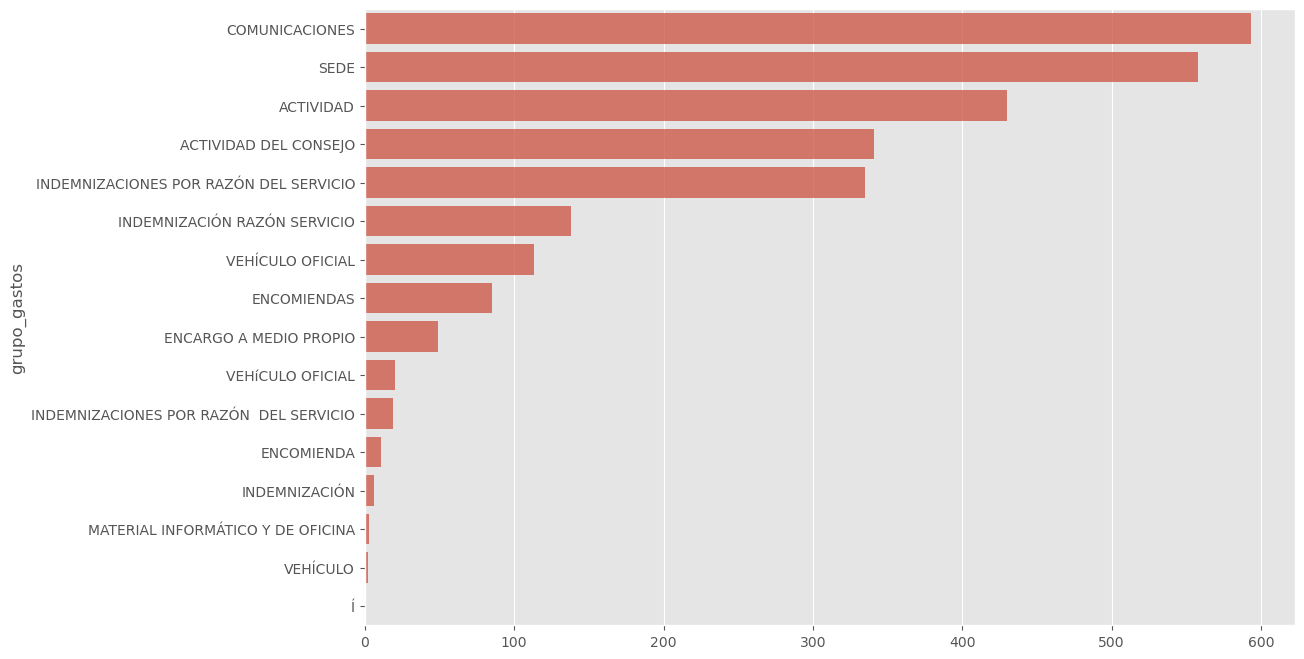

In [36]:
x=df['grupo_gastos'].value_counts()
print(x,x.index)
sns.barplot(x=x.values, y=x.index, alpha=0.8)

In [37]:
df['grupo_gastos'].value_counts()

grupo_gastos
COMUNICACIONES                             593
SEDE                                       558
ACTIVIDAD                                  430
ACTIVIDAD DEL CONSEJO                      341
INDEMNIZACIONES POR RAZÓN DEL SERVICIO     335
INDEMNIZACIÓN RAZÓN SERVICIO               138
VEHÍCULO OFICIAL                           113
ENCOMIENDAS                                 85
ENCARGO A MEDIO PROPIO                      49
VEHíCULO OFICIAL                            20
INDEMNIZACIONES POR RAZÓN  DEL SERVICIO     19
ENCOMIENDA                                  11
INDEMNIZACIÓN                                6
MATERIAL INFORMÁTICO Y DE OFICINA            3
VEHÍCULO                                     2
Í                                            1
Name: count, dtype: int64

In [38]:
import unicodedata
# Función para eliminar tildes
def quitar_tildes(texto):
    # Check if the input is a string, if not convert to string
    if not isinstance(texto, str):
        texto = str(texto)
    return unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')


def consolidar(x):
    # Quita tildes y normaliza el input
    x = quitar_tildes(x).upper().strip()

    if x == 'ACTIVIDAD' or x == 'ACTIVIDAD DEL CONSEJO':
        return 'ACTIVIDAD'
    elif x in ['INDEMNIZACIONES POR RAZON DEL SERVICIO', 'INDEMNIZACION RAZON SERVICIO', 'INDEMNIZACIONES POR RAZON DEL SERVICIO', 'INDEMNIZACION', 'INDEMNIZACIONES POR RAZON DEL SERVICIO','INDEMNIZACIONES POR RAZON  DEL SERVICIO']:
        return 'INDEMNIZACIONES'
    elif x in ['VEHICULO OFICIAL', 'VEHICULO','I']:
        return 'VEHICULO'
    elif x in ['ENCOMIENDAS', 'ENCOMIENDA']:
        return 'ENCOMIENDAS'
    elif x in ['MATERIAL INFORMATICO Y OFICINA', 'MATERIAL INFORMATICO Y DE OFICINA', 'MATERIAL INFORMATICO Y OF.']:
        return 'ACTIVIDAD'
    elif x in ['SUMINISTROS', 'SUMINISTRO']:
        return 'SUMINISTRO'
    elif x in ['PUBLICIDAD Y COMUNICACION', 'CAMPANAS PUBLICIDAD', 'PUBLICIDAD Y DOCUMENTACION', 'PUBLICIDAD']:
        return 'PUBLICIDAD'
    elif x in ['COMBUSTIBLE Y LAVADOS', 'COMBUSTIBLE, LAVADOS Y OTROS', 'COMBUSTIBLE-LAVADO']:
        return 'COMBUSTIBLE Y LAVADOS'
    elif x in ['REUNIONES, CONFERENCIAS Y CURSOS', 'REUNIONES Y CONFERENCIAS']:
        return 'REUNIONES, CONFERENCIAS Y CURSOS'
    elif x in ['ASISTENCIA SESIONES COMISION CONSULTIVA', 'ASISTNCIA SESIONES COMISION CONSULTIVA', 'ASISTENCIA SESIONES']:
        return 'ASISTENCIA SESIONES COMISION CONSULTIVA'
    elif x in ['TELEFONIA-INTERNET', 'TELEFONIA E INTERNET']:
        return 'TELEFONIA E INTERNET'
    elif x in ['SERV. GESTION INFRAESTRUCTURAS TIC', 'SERVICIO DE GESTION DE INFR. TIC']:
        return 'SERV. GESTION INFRAESTRUCTURAS TIC'
    elif x in ['FORMACION INTERNA']:
        return 'FORMACION INTERNA'
    elif x in ['ADQUISICION', 'ADQ LIBROS/DOCUMENTACION']:
        return 'ADQUISICION'
    elif x in ['GASTOS CONTENCIOSOS', 'GASTOS CONTENCIOSO']:
        return 'GASTOS CONTENCIOSOS'
    elif x in ['MANTENIMIENTO', 'MANTENIMIENTO COCHE']:
        return 'MANTENIMIENTO'
    elif x in ['VESTUARIO', 'VESTUARIO PERSONAL LABORAL']:
        return 'VESTUARIO'
    elif x == 'COMUNICACIONES':
        return 'COMUNICACIONES'
    elif x == 'SEDE':
        return 'SEDE'
    else:
        return x

df['grupo_gastos'] = df['grupo_gastos'].apply(quitar_tildes)
df['grupo_gastos_n'] = df['grupo_gastos'].map(lambda x: consolidar(x))

In [39]:
df['grupo_gastos_n'].value_counts()

grupo_gastos_n
ACTIVIDAD                 774
COMUNICACIONES            593
SEDE                      558
INDEMNIZACIONES           498
VEHICULO                  136
ENCOMIENDAS                96
ENCARGO A MEDIO PROPIO     49
Name: count, dtype: int64

grupo_gastos_n
ACTIVIDAD                 774
COMUNICACIONES            593
SEDE                      558
INDEMNIZACIONES           498
VEHICULO                  136
ENCOMIENDAS                96
ENCARGO A MEDIO PROPIO     49
Name: count, dtype: int64 Index(['ACTIVIDAD', 'COMUNICACIONES', 'SEDE', 'INDEMNIZACIONES', 'VEHICULO',
       'ENCOMIENDAS', 'ENCARGO A MEDIO PROPIO'],
      dtype='object', name='grupo_gastos_n')


<Axes: ylabel='grupo_gastos_n'>

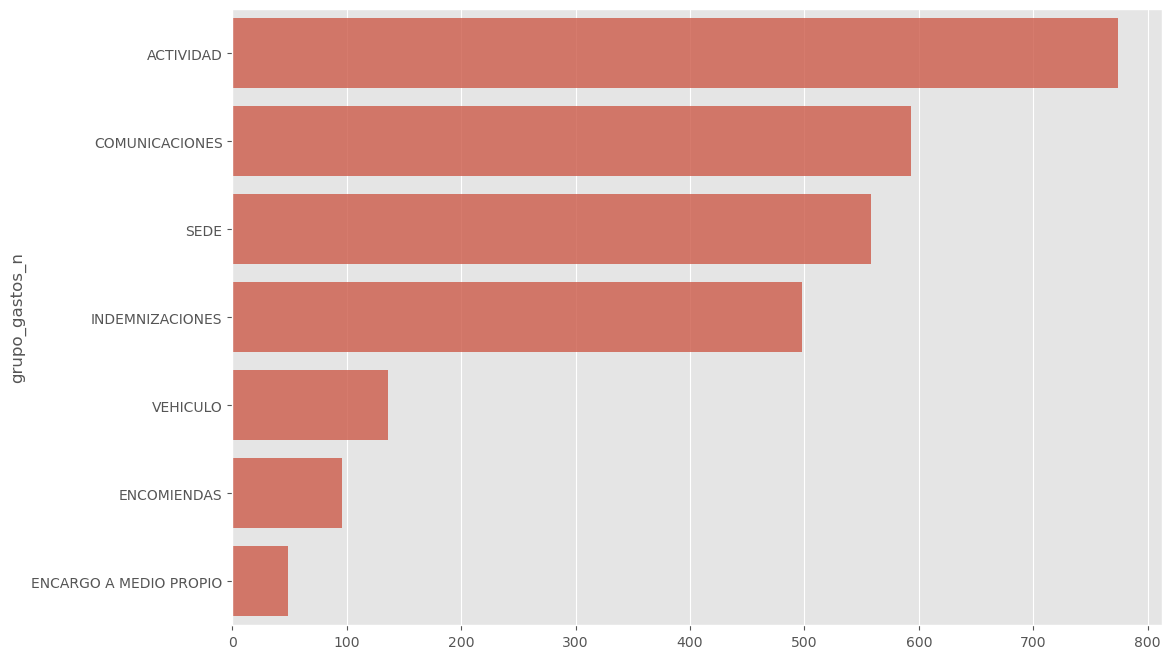

In [40]:
x=df['grupo_gastos_n'].value_counts()
print(x,x.index)
sns.barplot(x=x.values, y=x.index, alpha=0.8)

In [41]:
def grupogastoscod(x): 
    if x=="ACTIVIDAD" :
        return 0 
    elif x=="COMUNICACIONES" :
        return 1
    elif x=="ENCARGO A MEDIO PROPIO" :
        return 2 
    elif x=="ENCOMIENDAS" :
        return 3
    elif x=="INDEMNIZACIONES" :
        return 4
    elif x=="SEDE" :
        return 5
    elif x=="VEHICULO" :
        return 6
df['df_GrupoGastos'] =df['grupo_gastos_n'].map(lambda x: grupogastoscod(x))

In [42]:
from sklearn.preprocessing import LabelEncoder
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Convertir la variable categórica en una columna numérica
df['df_GrupoGastos'] = label_encoder.fit_transform(df['df_GrupoGastos'])

#### Consolidación de la variable subgrupo

subgrupo
TELEFONÍA-INTERNET                    467
DIETAS                                446
MANTENIMIENTO                         364
MATERIAL INFORMÁTICO Y DE OFICINA     209
POSTAL                                120
                                     ... 
MATERIAL INFORMÁTICO  Y DE OFICINA      1
MATERIAL INFORMÁTICO Y OF,              1
ADQ,LIBROS/DOCUMENTACIÓN                1
FORMACION INTERNA                       1
IDENTIDAD CORPORATIVA                   1
Name: count, Length: 67, dtype: int64 Index(['TELEFONÍA-INTERNET', 'DIETAS', 'MANTENIMIENTO',
       'MATERIAL INFORMÁTICO Y DE OFICINA', 'POSTAL', 'SUMINISTROS',
       'GASTOS CONTENCIOSOS', 'SANDETEL', 'DOCUMENTACIÓN Y PUBLICACIONES',
       'COMBUSTIBLE Y LAVADOS', 'PLANES Y PROGRAMAS', 'TRIBUTOS',
       'ADQ, LIBROS / DOCUMENTACIÓN', 'FORMACIÓN INTERNA',
       'SERV, GESTIÓN INFRAESTRUCTURAS TIC', 'SUMINISTRO',
       'REUNIONES, CONFERENCIAS Y CURSOS', 'MATERIAL INFORMÁTICO Y OFICINA',
       'MATERIAL INFORMÁTICO Y

<Axes: ylabel='subgrupo'>

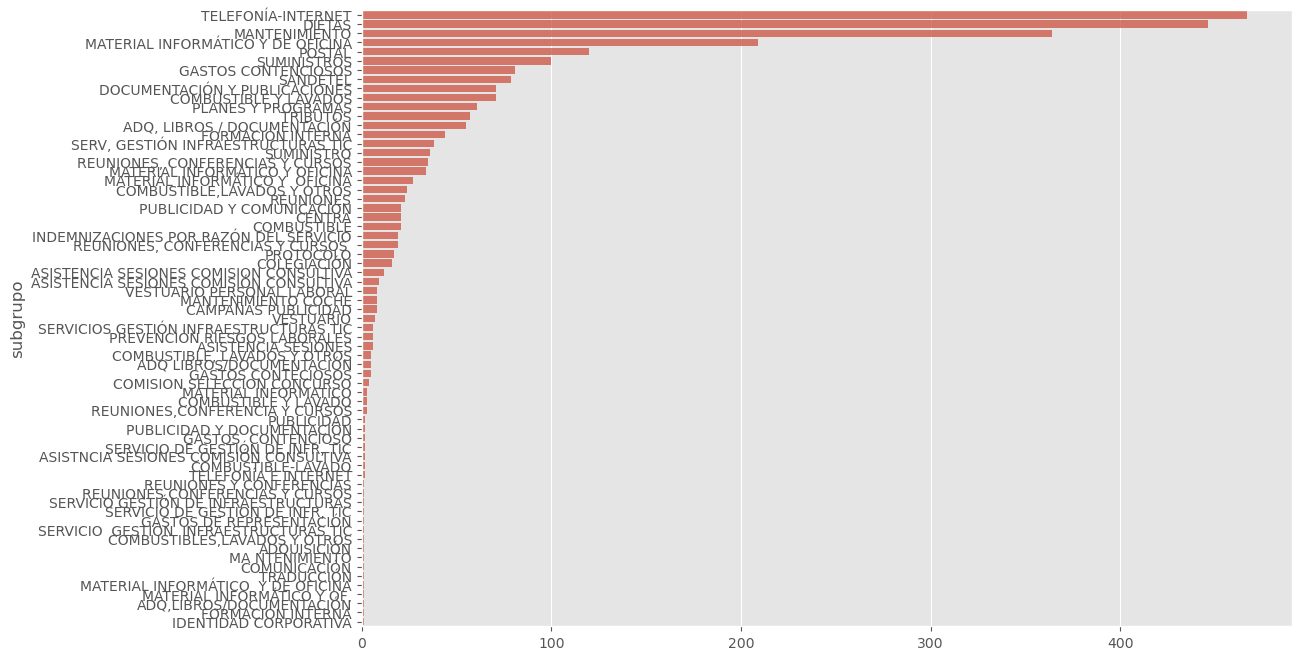

In [44]:
x=df['subgrupo'].value_counts()
print(x,x.index)
sns.barplot(x=x.values, y=x.index, alpha=0.8)

In [45]:
import unicodedata
# Función para eliminar tildes
def quitar_tildes(texto):
    # Check if the input is a string, if not convert to string
    if not isinstance(texto, str):
        texto = str(texto)
    return unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')

def discretiza_subgrupo(subgrupo):

    if subgrupo in ['TELEFONIA-INTERNET', 'TELEFONIA E INTERNET']:
        return 'TELEFONIA E INTERNET'
    elif subgrupo in ['MATERIAL INFORMATICO Y DE OFICINA', 'MATERIAL INFORMATICO Y OFICINA', 'MATERIAL INFORMATICO Y OF.','MATERIAL INFORMATICO','MATERIAL INFORMATICO Y DE OFICINA','MATERIAL INFORMATICO Y OFICINA','MATERIAL INFORMATICO Y OF','MATERIAL INFORMATICO Y OFICINA','MATERIAL INFORMATICO Y OF,',
      'MATERIAL INFORMATICO  Y DE OFICINA','MATERIAL INFORMATICO Y  OFICINA']:
        return 'MATERIAL INFORMATICO Y DE OFICINA'
    elif subgrupo in ['SERVICIO DE GESTION DE INFR. TIC', 'SERV. GESTION INFRAESTRUCTURAS TIC', 'SERVICIO GESTION DE INFRAESTRUCTURAS','SERV. GESTION INFRAESTRUCTURAS TIC','SERVICIO DE GESTION DE INFR, TIC','FORMACION INTERNA', 'SERV, GESTION INFRAESTRUCTURAS TIC','SERVICIOS GESTION INFRAESTRUCTURAS TIC',
       'SERV. GESTION INFRAESTRUCTURAS TIC', 'SERVICIO  GESTION  INFRAESTRUCTURAS TIC']:
        return 'SERV. GESTION INFRAESTRUCTURAS TIC'
    elif subgrupo == 'SANDETEL':
        return 'SANDETEL'
    elif subgrupo in ['SUMINISTROS', 'SUMINISTRO']:
        return 'SUMINISTROS'
    elif subgrupo in ['FORMACION INTERNA']:
        return 'FORMACION INTERNA'
    elif subgrupo in ['REUNIONES, CONFERENCIAS Y CURSOS', 'REUNIONES. CONFERENCIAS Y CURSOS', 'REUNIONES Y CONFERENCIAS', 'REUNIONES', 'REUNIONES,CONFERENCIA Y CURSOS', 'REUNIONES,CONFERENCIAS Y CURSOS','REUNIONES, CONFERENCIAS Y CURSOS ']:
        return 'REUNIONES, CONFERENCIAS Y CURSOS'
    elif subgrupo in ['COMBUSTIBLE', 'COMBUSTIBLE Y LAVADOS', 'COMBUSTIBLE-LAVADO', 'COMBUSTIBLES', 'LAVADOS Y OTROS','COMBUSTIBLE', 'LAVADOS Y OTROS','COMBUSTIBLE,LAVADOS Y OTROS','COMBUSTIBLES,LAVADOS Y OTROS','COMBUSTIBLE Y LAVADO','COMBUSTIBLE, LAVADOS Y OTROS']:
        return 'COMBUSTIBLE Y LAVADOS'
    elif subgrupo in ['GASTOS CONTENCIOSOS', 'GASTOS CONTECIOSOS', 'GASTOS  CONTENCIOSO']:
        return 'GASTOS CONTENCIOSOS'
    elif subgrupo in ['DOCUMENTACION Y PUBLICACIONES','ADQUISICION'	, 'ADQ. LIBROS / DOCUMENTACION','ADQ,LIBROS/DOCUMENTACION', 'ADQ LIBROS/DOCUMENTACION', 'ADQ.LIBROS/DOCUMENTACION', 'PUBLICIDAD Y DOCUMENTACION']:
        return 'DOCUMENTACION Y PUBLICACIONES'
    elif subgrupo in ['PUBLICIDAD Y COMUNICACION', 'CAMPANAS PUBLICIDAD', 'PUBLICIDAD', 'COMUNICACION']:
        return 'PUBLICIDAD Y COMUNICACION'
    elif subgrupo in ['ASISTENCIA SESIONES COMISION CONSULTIVA', 'ASISTENCIA SESIONES COMISION CONSULTIVA', 'ASISTENCIA SESIONES', 'ASISTNCIA SESIONES COMISION CONSULTIVA']:
        return 'ASISTENCIA SESIONES COMISION CONSULTIVA'
    elif subgrupo == 'INDEMNIZACIONES POR RAZON DEL SERVICIO':
        return 'INDEMNIZACIONES POR RAZON DEL SERVICIO'
    elif subgrupo == 'PROTOCOLO':
        return 'PROTOCOLO'
    elif subgrupo == 'COLEGIACION':
        return 'COLEGIACION'
    elif subgrupo == 'IDENTIDAD CORPORATIVA':
        return 'IDENTIDAD CORPORATIVA'
    elif subgrupo == 'PREVENCION RIESGOS LABORALES':
        return 'PREVENCION RIESGOS LABORALES'
    elif subgrupo == 'GASTOS DE REPRESENTACION':
        return 'GASTOS DE REPRESENTACION'
    elif subgrupo == 'TRIBUTOS':
        return 'TRIBUTOS'
    elif subgrupo == 'TRADUCCION':
        return 'TRADUCCION'
    elif subgrupo in ['VESTUARIO PERSONAL LABORAL', 'VESTUARIO']:
        return 'VESTUARIO'
    elif subgrupo in ['MA NTENIMIENTO', 'MANTENIMIENTO COCHE']:
        return 'MANTENIMIENTO'
    elif subgrupo == 'PLANES Y PROGRAMAS':
        return 'PLANES'
    elif subgrupo == 'POSTAL':
        return 'POSTAL'
    elif subgrupo == 'CENTRA':
        return 'CENTRA'
    elif subgrupo == 'COMISION SELECCION CONCURSO':
        return 'COMISION SELECCION CONCURSO'
    else:
        return subgrupo

df['subgrupo'] = df['subgrupo'].apply(quitar_tildes)


df['df_subgrupo'] = df['subgrupo'].map(lambda x: discretiza_subgrupo(x))



In [46]:
# Obtener las frecuencias de la columna 'subgrupo'
frecuencias = df['df_subgrupo'].value_counts()

# Convertir a un DataFrame
tabla_frecuencias = frecuencias.reset_index()

# Renombrar las columnas para mayor claridad
tabla_frecuencias.columns = ['subgrupo', 'frecuencia']

# Ensure the 'subgrupo' column is of type string
tabla_frecuencias['subgrupo'] = tabla_frecuencias['subgrupo'].astype(str)

# Ordenar alfabéticamente por la columna 'subgrupo'
tabla_frecuencias_sorted = tabla_frecuencias.sort_values(by='subgrupo')



# Mostrar la tabla ordenada
tabla_frecuencias_sorted

,subgrupo,frecuencia
14,"ADQ, LIBROS / DOCUMENTACION",55
16,ASISTENCIA SESIONES COMISION CONSULTIVA,29
17,CENTRA,21
20,COLEGIACION,16
5,COMBUSTIBLE Y LAVADOS,127
23,COMISION SELECCION CONCURSO,4
1,DIETAS,446
10,DOCUMENTACION Y PUBLICACIONES,80
8,GASTOS CONTENCIOSOS,88
24,GASTOS DE REPRESENTACION,1


df_subgrupo
TELEFONIA E INTERNET                       469
DIETAS                                     446
MANTENIMIENTO                              373
MATERIAL INFORMATICO Y DE OFICINA          275
SUMINISTROS                                136
COMBUSTIBLE Y LAVADOS                      127
POSTAL                                     120
SERV. GESTION INFRAESTRUCTURAS TIC          94
GASTOS CONTENCIOSOS                         88
REUNIONES, CONFERENCIAS Y CURSOS            82
DOCUMENTACION Y PUBLICACIONES               80
SANDETEL                                    79
PLANES                                      61
TRIBUTOS                                    57
ADQ, LIBROS / DOCUMENTACION                 55
PUBLICIDAD Y COMUNICACION                   32
ASISTENCIA SESIONES COMISION CONSULTIVA     29
CENTRA                                      21
INDEMNIZACIONES POR RAZON DEL SERVICIO      19
PROTOCOLO                                   17
COLEGIACION                                 16
V

<Axes: ylabel='df_subgrupo'>

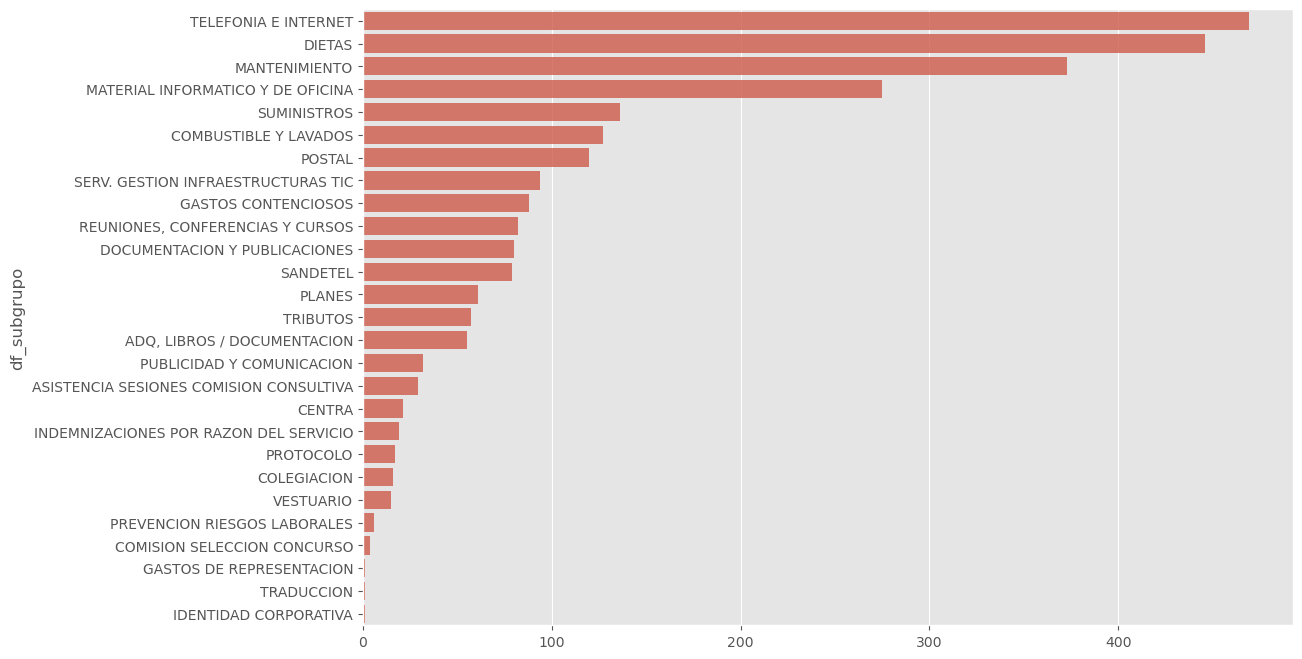

In [47]:
x=df['df_subgrupo'].value_counts()
print(x,x.index)
sns.barplot(x=x.values, y=x.index, alpha=0.8)

In [48]:
df['df_subgrupo'].info

<bound method Series.info of 0                    TELEFONIA E INTERNET
1                   COMBUSTIBLE Y LAVADOS
2                               PROTOCOLO
3                    TELEFONIA E INTERNET
4                    TELEFONIA E INTERNET
                      ...                
2699                        MANTENIMIENTO
2700    MATERIAL INFORMATICO Y DE OFICINA
2701        DOCUMENTACION Y PUBLICACIONES
2702                               PLANES
2703                             SANDETEL
Name: df_subgrupo, Length: 2704, dtype: object>

In [49]:
# Convertir las columnas procesadas a tipo categórico antes de aplicar Binary Encoding
df['df_subgrupon'] = df['df_subgrupo'].astype('category')

# Codificar las etiquetas (Subgrupo)
label_encoder_subgrupon = LabelEncoder()


# Aplicar Label Encoding a 'df_subgrupo'
df['subgrupo_label'] = label_encoder_subgrupon.fit_transform(df['df_subgrupon'])

# Aplicar Binary Encoding a las columnas originales preprocesadas
binary_encoder_subgrupon = BinaryEncoder(cols=['df_subgrupon'])

# Transformar el DataFrame
df_subgrupon_binario = binary_encoder_subgrupon.fit_transform(df)


In [50]:
df['df_subgrupo']

0                    TELEFONIA E INTERNET
1                   COMBUSTIBLE Y LAVADOS
2                               PROTOCOLO
3                    TELEFONIA E INTERNET
4                    TELEFONIA E INTERNET
                      ...                
2699                        MANTENIMIENTO
2700    MATERIAL INFORMATICO Y DE OFICINA
2701        DOCUMENTACION Y PUBLICACIONES
2702                               PLANES
2703                             SANDETEL
Name: df_subgrupo, Length: 2704, dtype: object

#### Consolidación de la variable denominacion_acreedor

In [52]:
df['denominacion_acreedor'].value_counts()
# Obtener las frecuencias de la columna 'subgrupo'

denominacion_acreedor
SDAD AND PARA EL DESARROLLO DE LAS     147
TELEFONICA DE ESPAÑA SAU TELEFONICA    140
VODAFONE ESPAÑA SA                     123
MANUEL MEDINA GUERRERO                 119
SOCIEDAD ESTATAL CORREOS Y TELEGRAF    115
                                      ... 
RAFAEL RUBIO NUÑEZ                       1
JUAN CARLOS GARCIA MELIAN                1
COMBUST, MAYO BAM SOLRED SA              1
BREAD&MORE SL                            1
FAMILYDIFERENT SL                        1
Name: count, Length: 355, dtype: int64

denominacion_acreedor
SDAD AND PARA EL DESARROLLO DE LAS     147
TELEFONICA DE ESPAÑA SAU TELEFONICA    140
VODAFONE ESPAÑA SA                     123
MANUEL MEDINA GUERRERO                 119
SOCIEDAD ESTATAL CORREOS Y TELEGRAF    115
                                      ... 
RAFAEL RUBIO NUÑEZ                       1
JUAN CARLOS GARCIA MELIAN                1
COMBUST, MAYO BAM SOLRED SA              1
BREAD&MORE SL                            1
FAMILYDIFERENT SL                        1
Name: count, Length: 355, dtype: int64 Index(['SDAD AND PARA EL DESARROLLO DE LAS',
       'TELEFONICA DE ESPAÑA SAU TELEFONICA', 'VODAFONE ESPAÑA SA',
       'MANUEL MEDINA GUERRERO', 'SOCIEDAD ESTATAL CORREOS Y TELEGRAF',
       'UTE TDE TME DCLXXX', 'PURIFY HISPANIA SL', 'ENRIQUE GAVIRA SANCHEZ',
       'SOLRED SA', 'PEDREGOSA SL',
       ...
       'ISAAC MARTIN DELGADO', 'JOSE FELIX ONTAÑON CARMONA',
       'FRANCISCO JAVIER MARTIN CAVANNA', 'LAURA CHAQUES BONAFONT',
       'MARTIN MARIA RAZQUIN

<Axes: ylabel='denominacion_acreedor'>

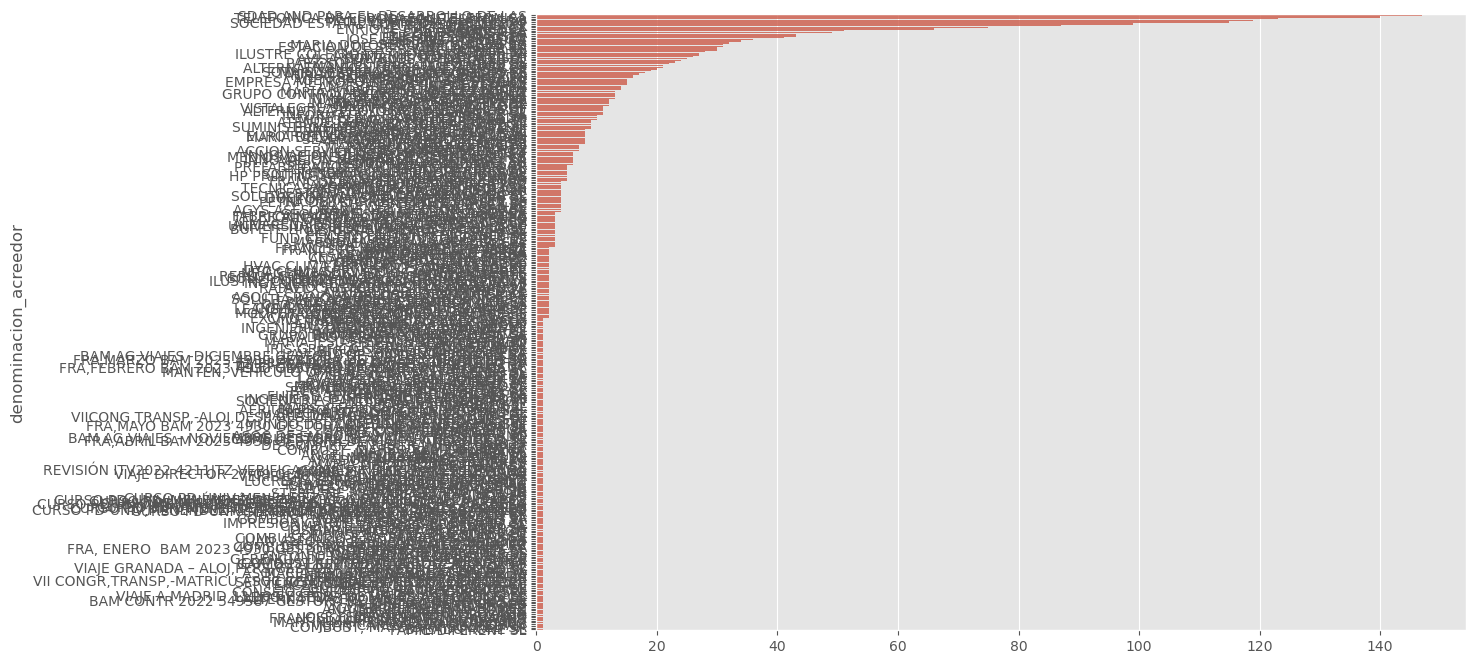

In [53]:
x=df['denominacion_acreedor'].value_counts()
print(x,x.index)
sns.barplot(x=x.values, y=x.index, alpha=0.8)

In [54]:
import unicodedata


def consolidar_acre(x):
  if x=="AMADOR MARTINEZ HERRERA" or x=="AMADOR MARTNEZ HERRERA":
    return "AMADOR MARTINEZ HERRERA"
  elif x=="ARTES GRAFICA MORENO SL" or x=="ARTES GRAFICA MORENO SLL" or x=="ARTES GRAFICAS MORENO SL":
    return "ARTES GRAFICAS MORENO SL"
  elif x=="JESUS JIMENEZ LOPEZ" or x=="JESUS JIMENEZ LOPEZ" or x=="JESUS JIMINEZ LOPEZ" or x=="JJESUS JIMENEZ LOPEZ":
    return "JESUS JIMENEZ LOPEZ"
  elif x=="RICOH ESPANA SLU" or x=="RICOH ESPANA SLU" or x=="RICOH ESPANA, SLU":
    return "RICOH ESPANA, SLU"
  elif x=="SOLUTIA INNOVAWORD TECHNOLOGIES SL" or x=="SOLUTIA INNOVAWORLD TECHNOLOGIES S" or x=="SOLUTIA INNOVAWORLD TECHNOLOGIES, S":
    return "SOLUTIA INNOVAWORD TECHNOLOGIES SL"
  elif x=="TK ELEVADORES ESPANA SL" or x=="TK ELEVADORES ESPANAA SL":
    return "TK ELEVADORES ESPANAA SL"
  elif x=="TK ELEVADORES ESPANA SL" or x=="TK ELEVADORES ESPANAA SL":
    return "TK ELEVADORES ESPANAA SL"
  elif x=="VISTALEGRE SOLUTIONS S,L," or x=="TK ELEVADORES ESPANAA SL":
    return "VISTALEGRE SOLUTIONS S,L"
  else:
    return x

df['denominacion_acreedor'] = df['denominacion_acreedor'].map(lambda x: consolidar_acre(x))



denominacion_acreedor
SDAD AND PARA EL DESARROLLO DE LAS     147
TELEFONICA DE ESPAÑA SAU TELEFONICA    140
VODAFONE ESPAÑA SA                     123
MANUEL MEDINA GUERRERO                 119
SOCIEDAD ESTATAL CORREOS Y TELEGRAF    115
                                      ... 
FUNDACIÓN NOVAGOB                        1
JESUS JIMENEZ LO PEZ                     1
AGUSTI CERRILLO MARTINEZ                 1
ANA ISABEL BELTRAN GOMEZ                 1
FAMILYDIFERENT SL                        1
Name: count, Length: 351, dtype: int64 Index(['SDAD AND PARA EL DESARROLLO DE LAS',
       'TELEFONICA DE ESPAÑA SAU TELEFONICA', 'VODAFONE ESPAÑA SA',
       'MANUEL MEDINA GUERRERO', 'SOCIEDAD ESTATAL CORREOS Y TELEGRAF',
       'UTE TDE TME DCLXXX', 'PURIFY HISPANIA SL', 'ENRIQUE GAVIRA SANCHEZ',
       'SOLRED SA', 'PEDREGOSA SL',
       ...
       'CONSEJO GENERAL DE LA ABOGACIA ESPA',
       'VIAJE A MADRID 13,10 GESTORA DE VIAJES Y NEGOCIOS SL',
       'ALTERNATIVA ECOLÓGICA ANDALUCIA SL',
   

<Axes: ylabel='denominacion_acreedor'>

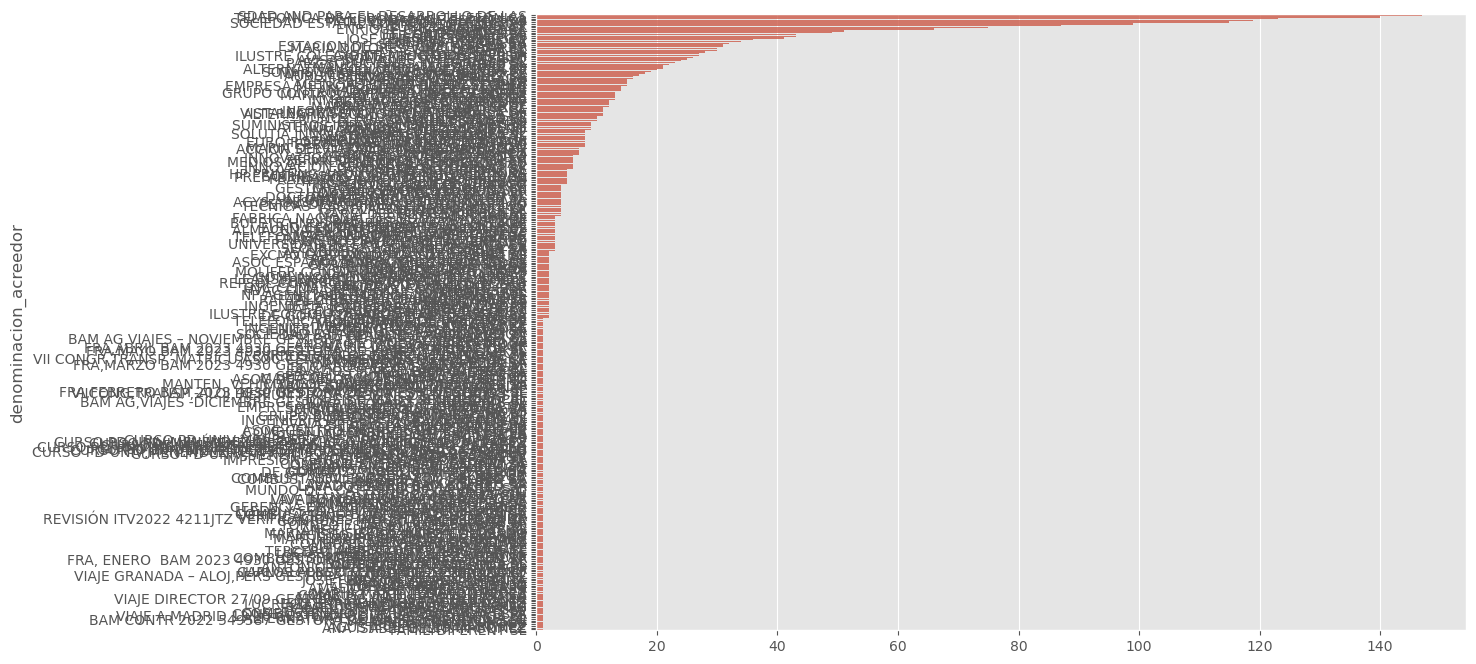

In [55]:
x=df['denominacion_acreedor'].value_counts()
print(x,x.index)
sns.barplot(x=x.values, y=x.index, alpha=0.8)

Procesamiento de texto a las variable denominacion_factura y denominacion_acreedor

In [57]:
!pip install category-encoders

zsh:1: command not found: pip


In [58]:
from category_encoders import BinaryEncoder
# Función de preprocesamiento de texto
def preprocesar(texto):
    # Quitar tildes
    texto = quitar_tildes(texto)
    
    # Convertir a minúsculas
    texto = texto.lower()
    
    # Eliminar números
    texto = re.sub(r'\d+', '', texto)
    
    # Eliminar puntuación
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    
    # Eliminar stopwords
    stop_words = set(stopwords.words('spanish'))
    palabras = word_tokenize(texto)
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    
    # Stemming (opcional)
    ps = PorterStemmer()
    palabras = [ps.stem(palabra) for palabra in palabras]
    
    # Volver a unir las palabras procesadas en una cadena
    texto_procesado = ' '.join(palabras)
    
    return texto_procesado

# Aplicar el preprocesamiento al DataFrame
df['df_denominacion_factura'] = df['denominacion_factura'].apply(preprocesar)
df['df_denominacion_acreedor'] = df['denominacion_acreedor'].apply(preprocesar)

# Convertir las columnas procesadas a tipo categórico antes de aplicar Binary Encoding
df['df_denominacion_factura'] = df['df_denominacion_factura'].astype('category')
df['df_denominacion_acreedor'] = df['df_denominacion_acreedor'].astype('category')

# Codificar las etiquetas (Denominacion Acreedor)
label_encoder_acreedor = LabelEncoder()
label_encoder_factura = LabelEncoder()

# Aplicar Label Encoding a 'df_denominacion_acreedor'
df['denominacion_acreedor_label'] = label_encoder_acreedor.fit_transform(df['df_denominacion_acreedor'])

# Aplicar Label Encoding a 'df_denominacion_factura'
df['denominacion_factura_label'] = label_encoder_factura.fit_transform(df['df_denominacion_factura'])

# Aplicar Binary Encoding a las columnas originales preprocesadas
binary_encoder_acreedor = BinaryEncoder(cols=['df_denominacion_acreedor'])
binary_encoder_factura = BinaryEncoder(cols=['df_denominacion_factura'])

# Transformar el DataFrame
df_acreedor_binario = binary_encoder_acreedor.fit_transform(df)
df_factura_binario = binary_encoder_factura.fit_transform(df)


df = pd.concat([df, df_acreedor_binario.add_prefix('bin_acreedor_'), df_factura_binario.add_prefix('bin_factura_')], axis=1)



In [59]:
print(df.dtypes)

fecha_entrada_registro                     datetime64[ns]
importe_total                                     float64
grupo_gastos                                       object
subgrupo                                           object
denominacion_factura                               object
                                                ...      
bin_factura_df_denominacion_factura_9               int64
bin_factura_df_denominacion_factura_10              int64
bin_factura_df_denominacion_acreedor             category
bin_factura_denominacion_acreedor_label             int64
bin_factura_denominacion_factura_label              int64
Length: 63, dtype: object


#### Procesamiento de la variable fecha_entrada_registro

In [61]:
# 1.La columna 'fecha_entrada_registro' está en formato datetime
df['fecha_entrada_registro'] = pd.to_datetime(df['fecha_entrada_registro'], errors='coerce')

# 2. Extraer atributos temporales relevantes
df['mes'] = df['fecha_entrada_registro'].astype(str).str[-2:].astype(int)
 # Mes del año (1-12)

df['bimestre'] = (df['fecha_entrada_registro'].dt.month - 1) // 2 + 1  # Bimestre (1-6)
df['trimestre'] = df['fecha_entrada_registro'].dt.quarter  # Trimestre (1-4)
df['semana_anio'] = df['fecha_entrada_registro'].dt.isocalendar().week  # Semana del año (1-52)
df['anio'] = df['fecha_entrada_registro'].dt.year  # Año


# 3. Calcular importes medios por diferentes períodos

# Importe medio por mes
importe_medio_mes = df.groupby(['anio', 'mes'])['importe_total'].mean().reset_index()
importe_medio_mes.columns = ['anio', 'mes', 'importe_medio_mes']

# Importe medio por bimestre
importe_medio_bimestre = df.groupby(['anio', 'bimestre'])['importe_total'].mean().reset_index()
importe_medio_bimestre.columns = ['anio', 'bimestre', 'importe_medio_bimestre']

# Importe medio por trimestre
importe_medio_trimestre = df.groupby(['anio', 'trimestre'])['importe_total'].mean().reset_index()
importe_medio_trimestre.columns = ['anio', 'trimestre', 'importe_medio_trimestre']

# Importe medio por semana del año
importe_medio_semana = df.groupby(['anio', 'semana_anio'])['importe_total'].mean().reset_index()
importe_medio_semana.columns = ['anio', 'semana_anio', 'importe_medio_semana']

# 4. Agregar estas nuevas tablas de importes medios al DataFrame original 
df = pd.merge(df, importe_medio_mes, on=['anio', 'mes'], how='left')
df = pd.merge(df, importe_medio_bimestre, on=['anio', 'bimestre'], how='left')
df = pd.merge(df, importe_medio_trimestre, on=['anio', 'trimestre'], how='left')
df = pd.merge(df, importe_medio_semana, on=['anio', 'semana_anio'], how='left')

# Guardar el DataFrame con las nuevas columnas en un archivo XLSX si es necesario
df.to_excel('data_with_fechas.xlsx', index=False)


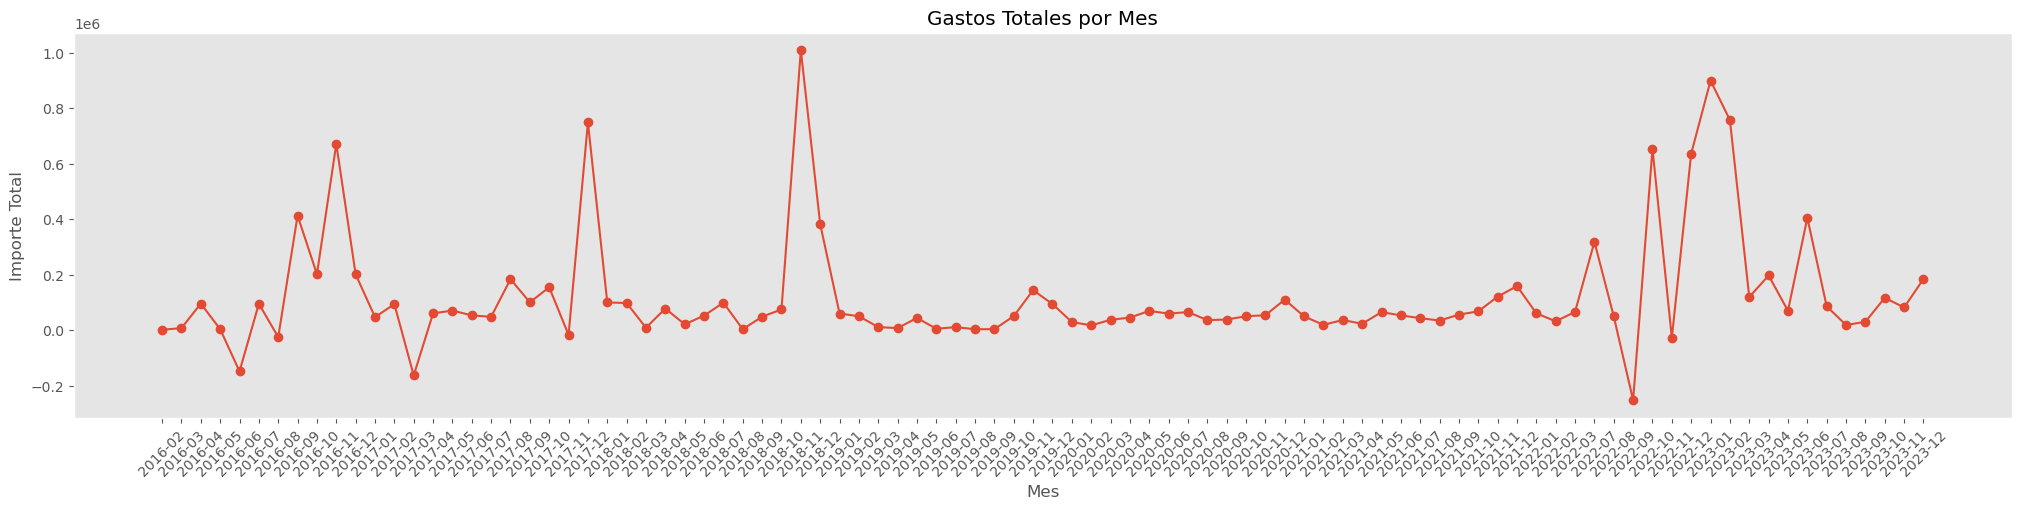

In [62]:
# Convertir la columna a datetime
df['fecha_entrada_registro'] = pd.to_datetime(df['fecha_entrada_registro'])

# Crear una nueva columna para el mes
df['mes2'] = df['fecha_entrada_registro'].dt.to_period('M')

# Agrupar por mes
gastos_por_mes = df.groupby('mes2')['importe_total'].sum()

# Graficar
plt.figure(figsize=(25, 5))
plt.plot(gastos_por_mes.index.astype(str), gastos_por_mes.values, marker='o')
plt.title('Gastos Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Importe Total')
plt.xticks(rotation=45)
plt.grid()
plt.show()


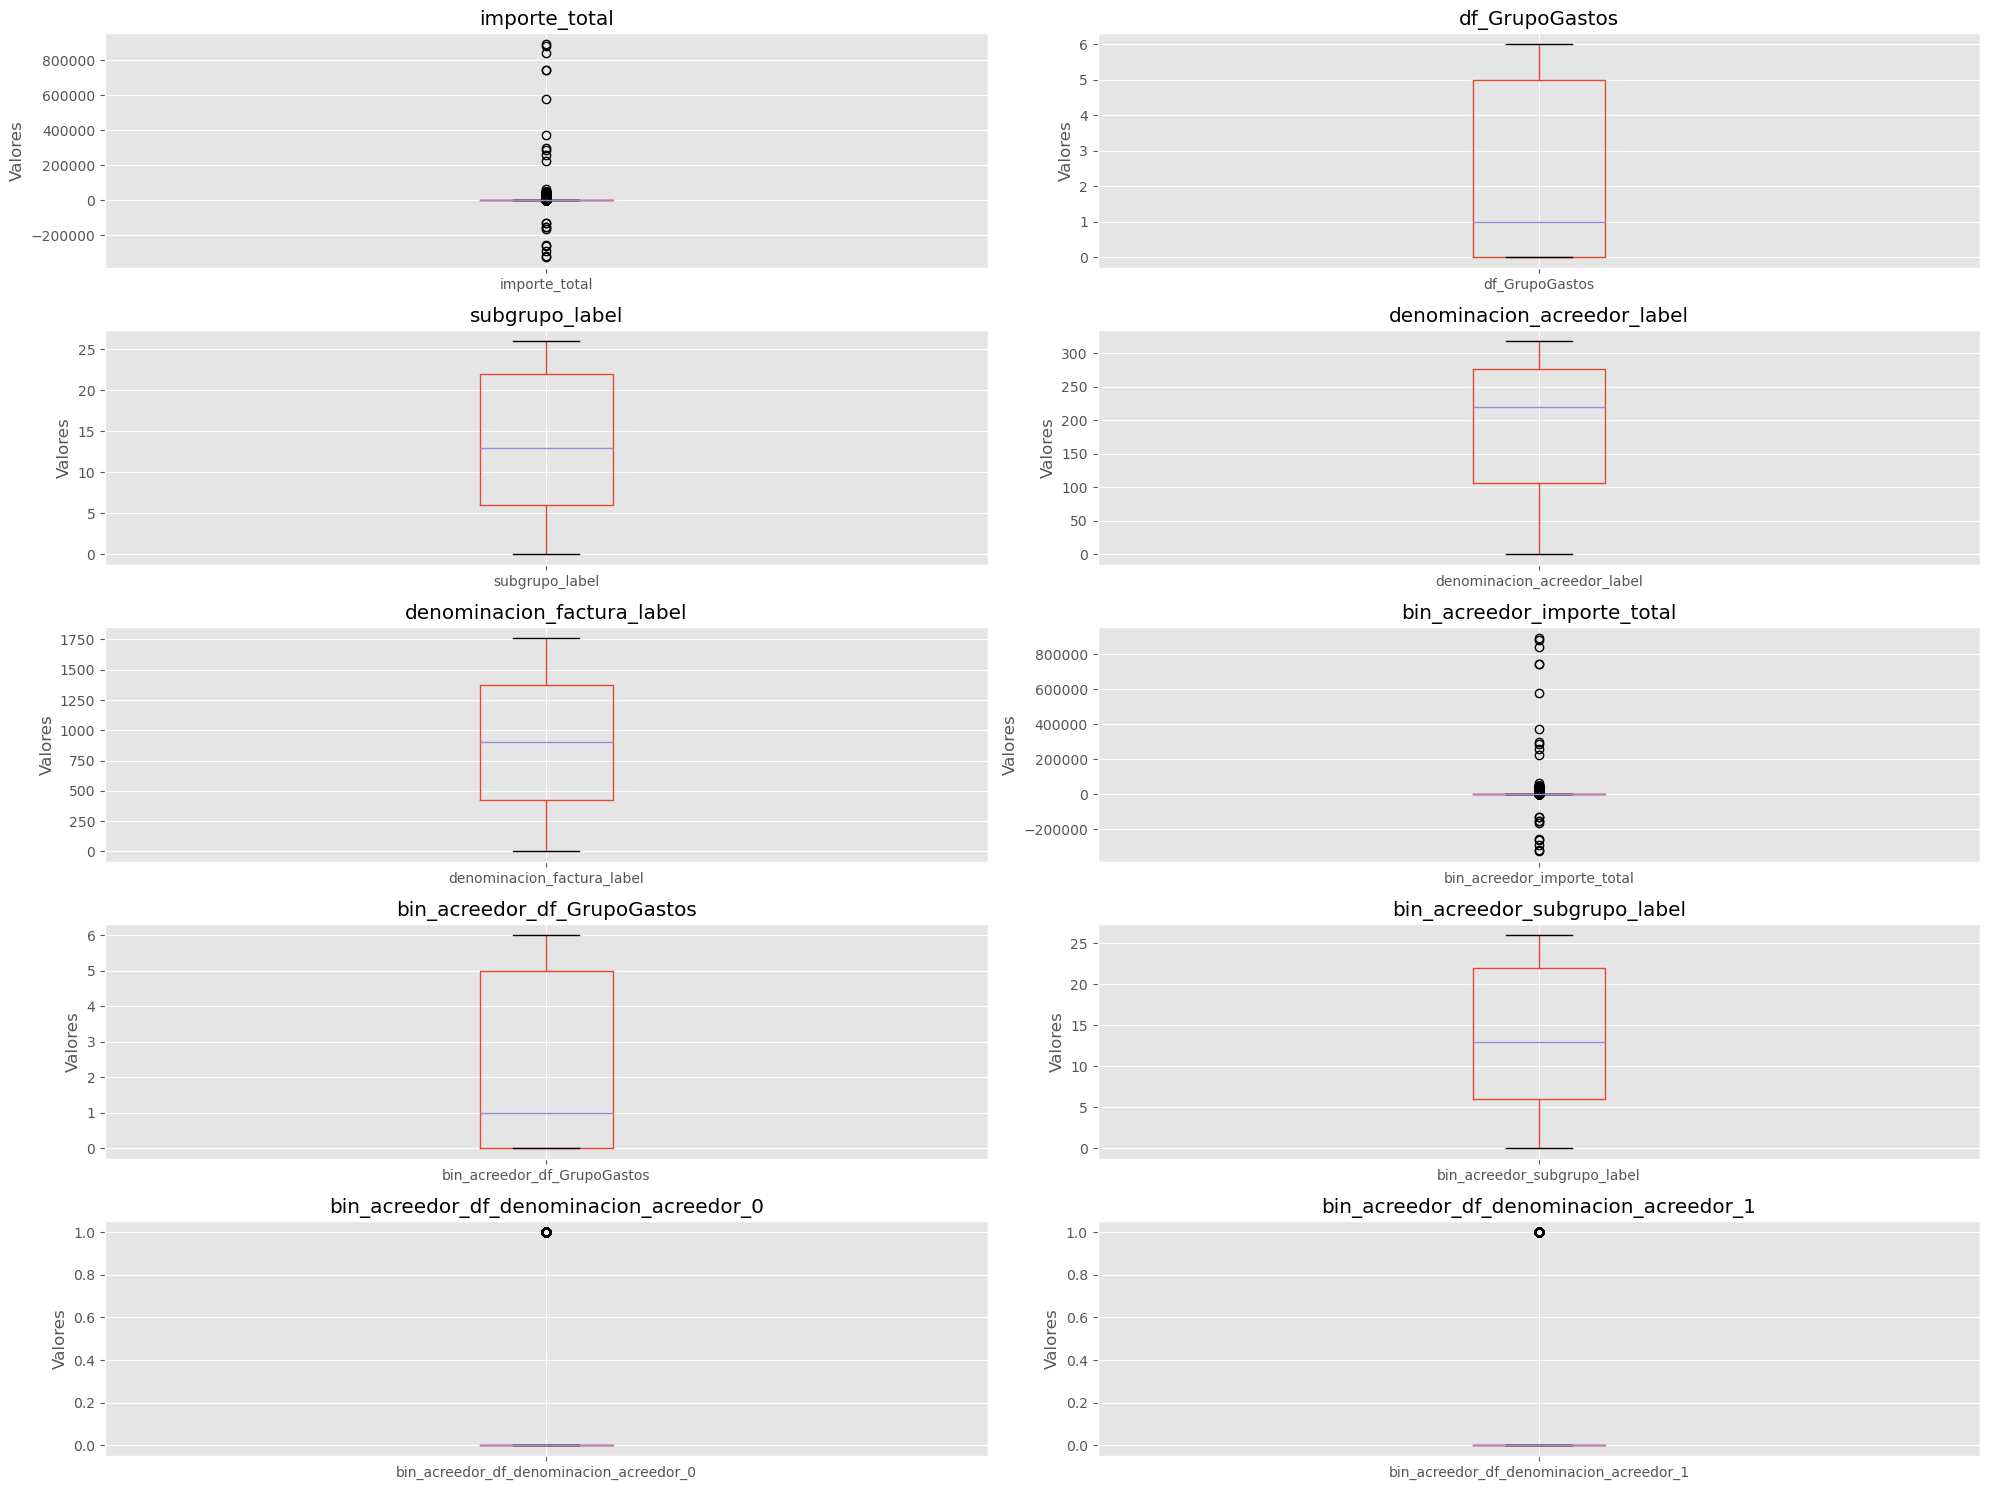

In [63]:
# Lista de nombres de las columnas numéricas
columnas = df.select_dtypes(include=['number']).columns

# Configurar la figura y los ejes para los subplots
fig, axes = plt.subplots(5, 2, figsize=(20, 15))

# Dibujar cada boxplot en su correspondiente subplot
for i, ax in enumerate(axes.flatten()):
    if i < len(columnas):  # Asegúrate de no exceder el número de columnas
        df.boxplot(column=columnas[i], ax=ax)
        ax.set_title(columnas[i])
        ax.set_ylabel('Valores')  # Etiqueta para el eje y

# Ajustar el layout
plt.tight_layout()
plt.show()

Las variables importe_medio_mes,  importe_medio_bimestre,  importe_medio_trimestre y importe_medio_semana son variables que están correlacionadas ya que se han calculado desde la variable importe total. Eliminamos importe_medio_bimestre , importe_medio_trimestre y importe_medio_semana. 

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 73 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   fecha_entrada_registro                    2704 non-null   datetime64[ns]
 1   importe_total                             2704 non-null   float64       
 2   grupo_gastos                              2704 non-null   object        
 3   subgrupo                                  2704 non-null   object        
 4   denominacion_factura                      2704 non-null   object        
 5   denominacion_acreedor                     2704 non-null   object        
 6   grupo_gastos_n                            2704 non-null   object        
 7   df_GrupoGastos                            2704 non-null   int64         
 8   df_subgrupo                               2704 non-null   object        
 9   df_subgrupon                  

In [66]:
# Selección de columnas específicas
df = df[['fecha_entrada_registro', 'mes', 'bimestre', 'trimestre', 'semana_anio', 'anio',
                       'importe_total', 'importe_medio_mes', 'importe_medio_bimestre', 'importe_medio_trimestre', 'importe_medio_semana',
                        'df_GrupoGastos', 'subgrupo_label', 
                       'denominacion_factura_label', 'denominacion_acreedor_label']]


In [67]:
df

,fecha_entrada_registro,mes,bimestre,trimestre,semana_anio,anio,importe_total,importe_medio_mes,importe_medio_bimestre,importe_medio_trimestre,importe_medio_semana,df_GrupoGastos,subgrupo_label,denominacion_factura_label,denominacion_acreedor_label
0,2019-01-10,10,1,1,2,2019,0.33,200.788000,1928.672456,1678.655278,1606.966667,1,23,937,289
1,2021-02-03,3,1,1,5,2021,1.00,799.366970,1399.497551,1417.977703,2291.212000,6,4,612,278
2,2023-06-26,26,3,2,26,2023,1.00,1379.680000,7536.785397,7550.782360,290.682000,0,17,227,109
3,2016-09-08,8,5,3,36,2016,1.17,-15789.117333,6907.443820,5307.802088,16244.681429,1,23,670,289
4,2016-09-08,8,5,3,36,2016,1.17,-15789.117333,6907.443820,5307.802088,16244.681429,1,23,664,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,2020-06-02,2,3,2,23,2020,9376.87,1661.153684,2928.840227,2902.553500,1776.596000,5,12,1753,264
2700,2021-11-26,26,6,4,47,2021,9408.57,1966.295000,2661.370667,2590.673881,2375.247143,0,13,150,280
2701,2022-03-02,2,2,1,9,2022,9519.07,1290.995263,1729.775526,1839.911512,1423.144545,0,7,1188,94
2702,2021-12-21,21,6,4,51,2021,9747.51,2730.399167,2661.370667,2590.673881,2602.794000,0,14,366,279


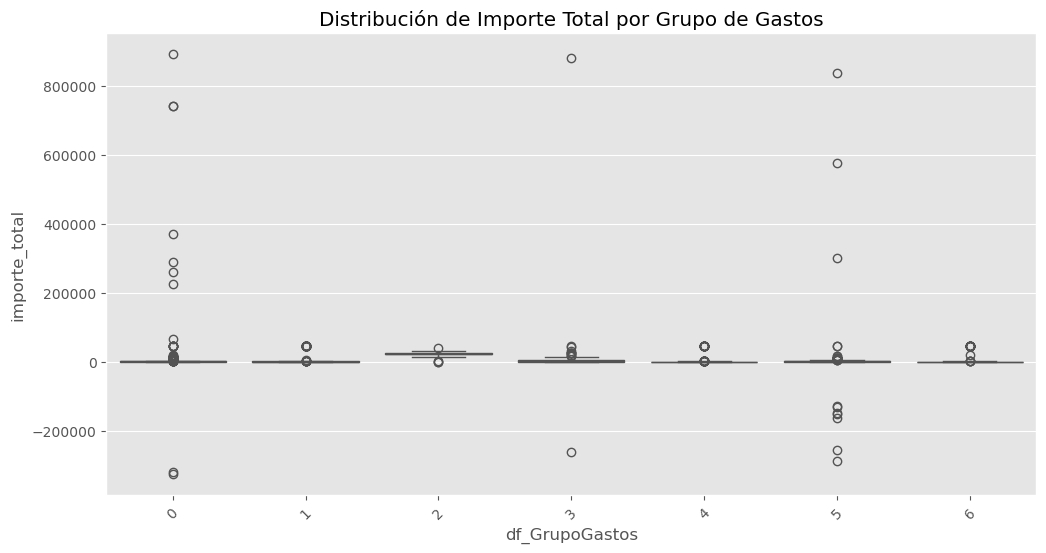

In [68]:
# Boxplot para ver la distribución de importe_total por grupo_gastos
plt.figure(figsize=(12, 6))
sns.boxplot(x='df_GrupoGastos', y='importe_total', data=df)
plt.title('Distribución de Importe Total por Grupo de Gastos')
plt.xticks(rotation=45)
plt.show()


/var/folders/4x/mfxr0f553zg10gj4tr4nrlb40000gn/T/ipykernel_27271/3015605840.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='df_GrupoGastos', y='importe_total', data=suma_importe, palette='Set2')


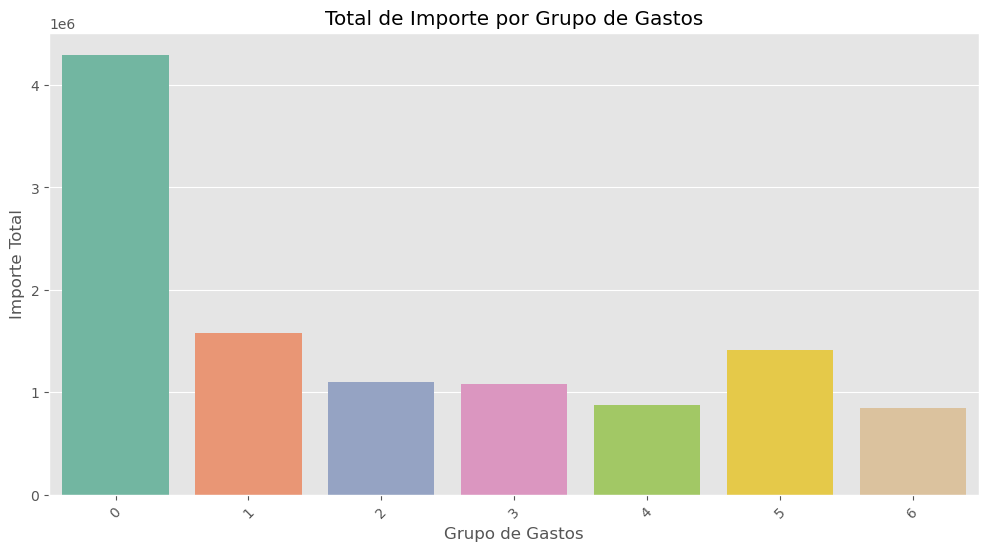

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la suma de importe_total por grupo de gastos
suma_importe = df.groupby('df_GrupoGastos')['importe_total'].sum().reset_index()

# Configurar la figura
plt.figure(figsize=(12, 6))

# Crear un gráfico de barras con colores diferentes para cada grupo
sns.barplot(x='df_GrupoGastos', y='importe_total', data=suma_importe, palette='Set2')

# Configurar el título y las etiquetas
plt.title('Total de Importe por Grupo de Gastos')
plt.xlabel('Grupo de Gastos')
plt.ylabel('Importe Total')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


/var/folders/4x/mfxr0f553zg10gj4tr4nrlb40000gn/T/ipykernel_27271/2457176394.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subgrupo_label', y='importe_total', data=suma_importe, palette='Set2')


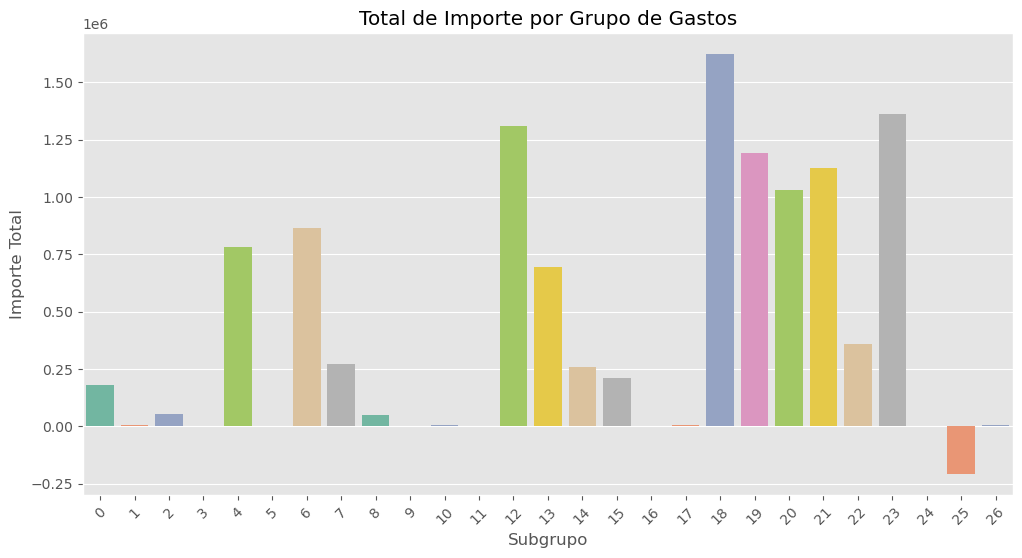

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la suma de importe_total por subgrupo
suma_importe = df.groupby('subgrupo_label')['importe_total'].sum().reset_index()

# Configurar la figura
plt.figure(figsize=(12, 6))

# Crear un gráfico de barras con colores diferentes para cada grupo
sns.barplot(x='subgrupo_label', y='importe_total', data=suma_importe, palette='Set2')

# Configurar el título y las etiquetas
plt.title('Total de Importe por Grupo de Gastos')
plt.xlabel('Subgrupo')
plt.ylabel('Importe Total')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [71]:
df

,fecha_entrada_registro,mes,bimestre,trimestre,semana_anio,anio,importe_total,importe_medio_mes,importe_medio_bimestre,importe_medio_trimestre,importe_medio_semana,df_GrupoGastos,subgrupo_label,denominacion_factura_label,denominacion_acreedor_label
0,2019-01-10,10,1,1,2,2019,0.33,200.788000,1928.672456,1678.655278,1606.966667,1,23,937,289
1,2021-02-03,3,1,1,5,2021,1.00,799.366970,1399.497551,1417.977703,2291.212000,6,4,612,278
2,2023-06-26,26,3,2,26,2023,1.00,1379.680000,7536.785397,7550.782360,290.682000,0,17,227,109
3,2016-09-08,8,5,3,36,2016,1.17,-15789.117333,6907.443820,5307.802088,16244.681429,1,23,670,289
4,2016-09-08,8,5,3,36,2016,1.17,-15789.117333,6907.443820,5307.802088,16244.681429,1,23,664,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,2020-06-02,2,3,2,23,2020,9376.87,1661.153684,2928.840227,2902.553500,1776.596000,5,12,1753,264
2700,2021-11-26,26,6,4,47,2021,9408.57,1966.295000,2661.370667,2590.673881,2375.247143,0,13,150,280
2701,2022-03-02,2,2,1,9,2022,9519.07,1290.995263,1729.775526,1839.911512,1423.144545,0,7,1188,94
2702,2021-12-21,21,6,4,51,2021,9747.51,2730.399167,2661.370667,2590.673881,2602.794000,0,14,366,279


In [72]:
corr_matrix =df.corr().abs()
corr_matrix

,fecha_entrada_registro,mes,bimestre,trimestre,semana_anio,anio,importe_total,importe_medio_mes,importe_medio_bimestre,importe_medio_trimestre,importe_medio_semana,df_GrupoGastos,subgrupo_label,denominacion_factura_label,denominacion_acreedor_label
fecha_entrada_registro,1.000000,0.049551,0.088252,0.083026,0.077682,0.991111,0.014115,0.043757,0.104498,0.127484,0.044972,0.053383,0.030924,0.088768,0.134543
mes,0.049551,1.000000,0.078534,0.075254,0.136798,0.070134,0.007010,0.027123,0.018663,0.019396,0.028250,0.091411,0.099484,0.050833,0.032385
bimestre,0.088252,0.078534,1.000000,0.963083,0.973942,0.043397,0.011210,0.032276,0.082673,0.110916,0.035920,0.024435,0.059040,0.025054,0.014224
trimestre,0.083026,0.075254,0.963083,1.000000,0.957906,0.046293,0.013771,0.028830,0.079442,0.121946,0.044103,0.020137,0.044540,0.018108,0.021790
semana_anio,0.077682,0.136798,0.973942,0.957906,1.000000,0.053531,0.011059,0.037141,0.078587,0.112906,0.035376,0.018732,0.060143,0.030712,0.023297
anio,0.991111,0.070134,0.043397,0.046293,0.053531,1.000000,0.012673,0.049037,0.093460,0.112222,0.040539,0.056814,0.039217,0.092803,0.131898
importe_total,0.014115,0.007010,0.011210,0.013771,0.011059,0.012673,1.000000,0.258431,0.135595,0.112925,0.312606,0.018513,0.023128,0.006391,0.015424
importe_medio_mes,0.043757,0.027123,0.032276,0.028830,0.037141,0.049037,0.258431,1.000000,0.124041,0.112163,0.311564,0.001674,0.030968,0.032599,0.013925
importe_medio_bimestre,0.104498,0.018663,0.082673,0.079442,0.078587,0.093460,0.135595,0.124041,1.000000,0.803477,0.434338,0.022617,0.016501,0.011858,0.018439
importe_medio_trimestre,0.127484,0.019396,0.110916,0.121946,0.112906,0.112222,0.112925,0.112163,0.803477,1.000000,0.361399,0.009432,0.010651,0.012219,0.033649


<Axes: >

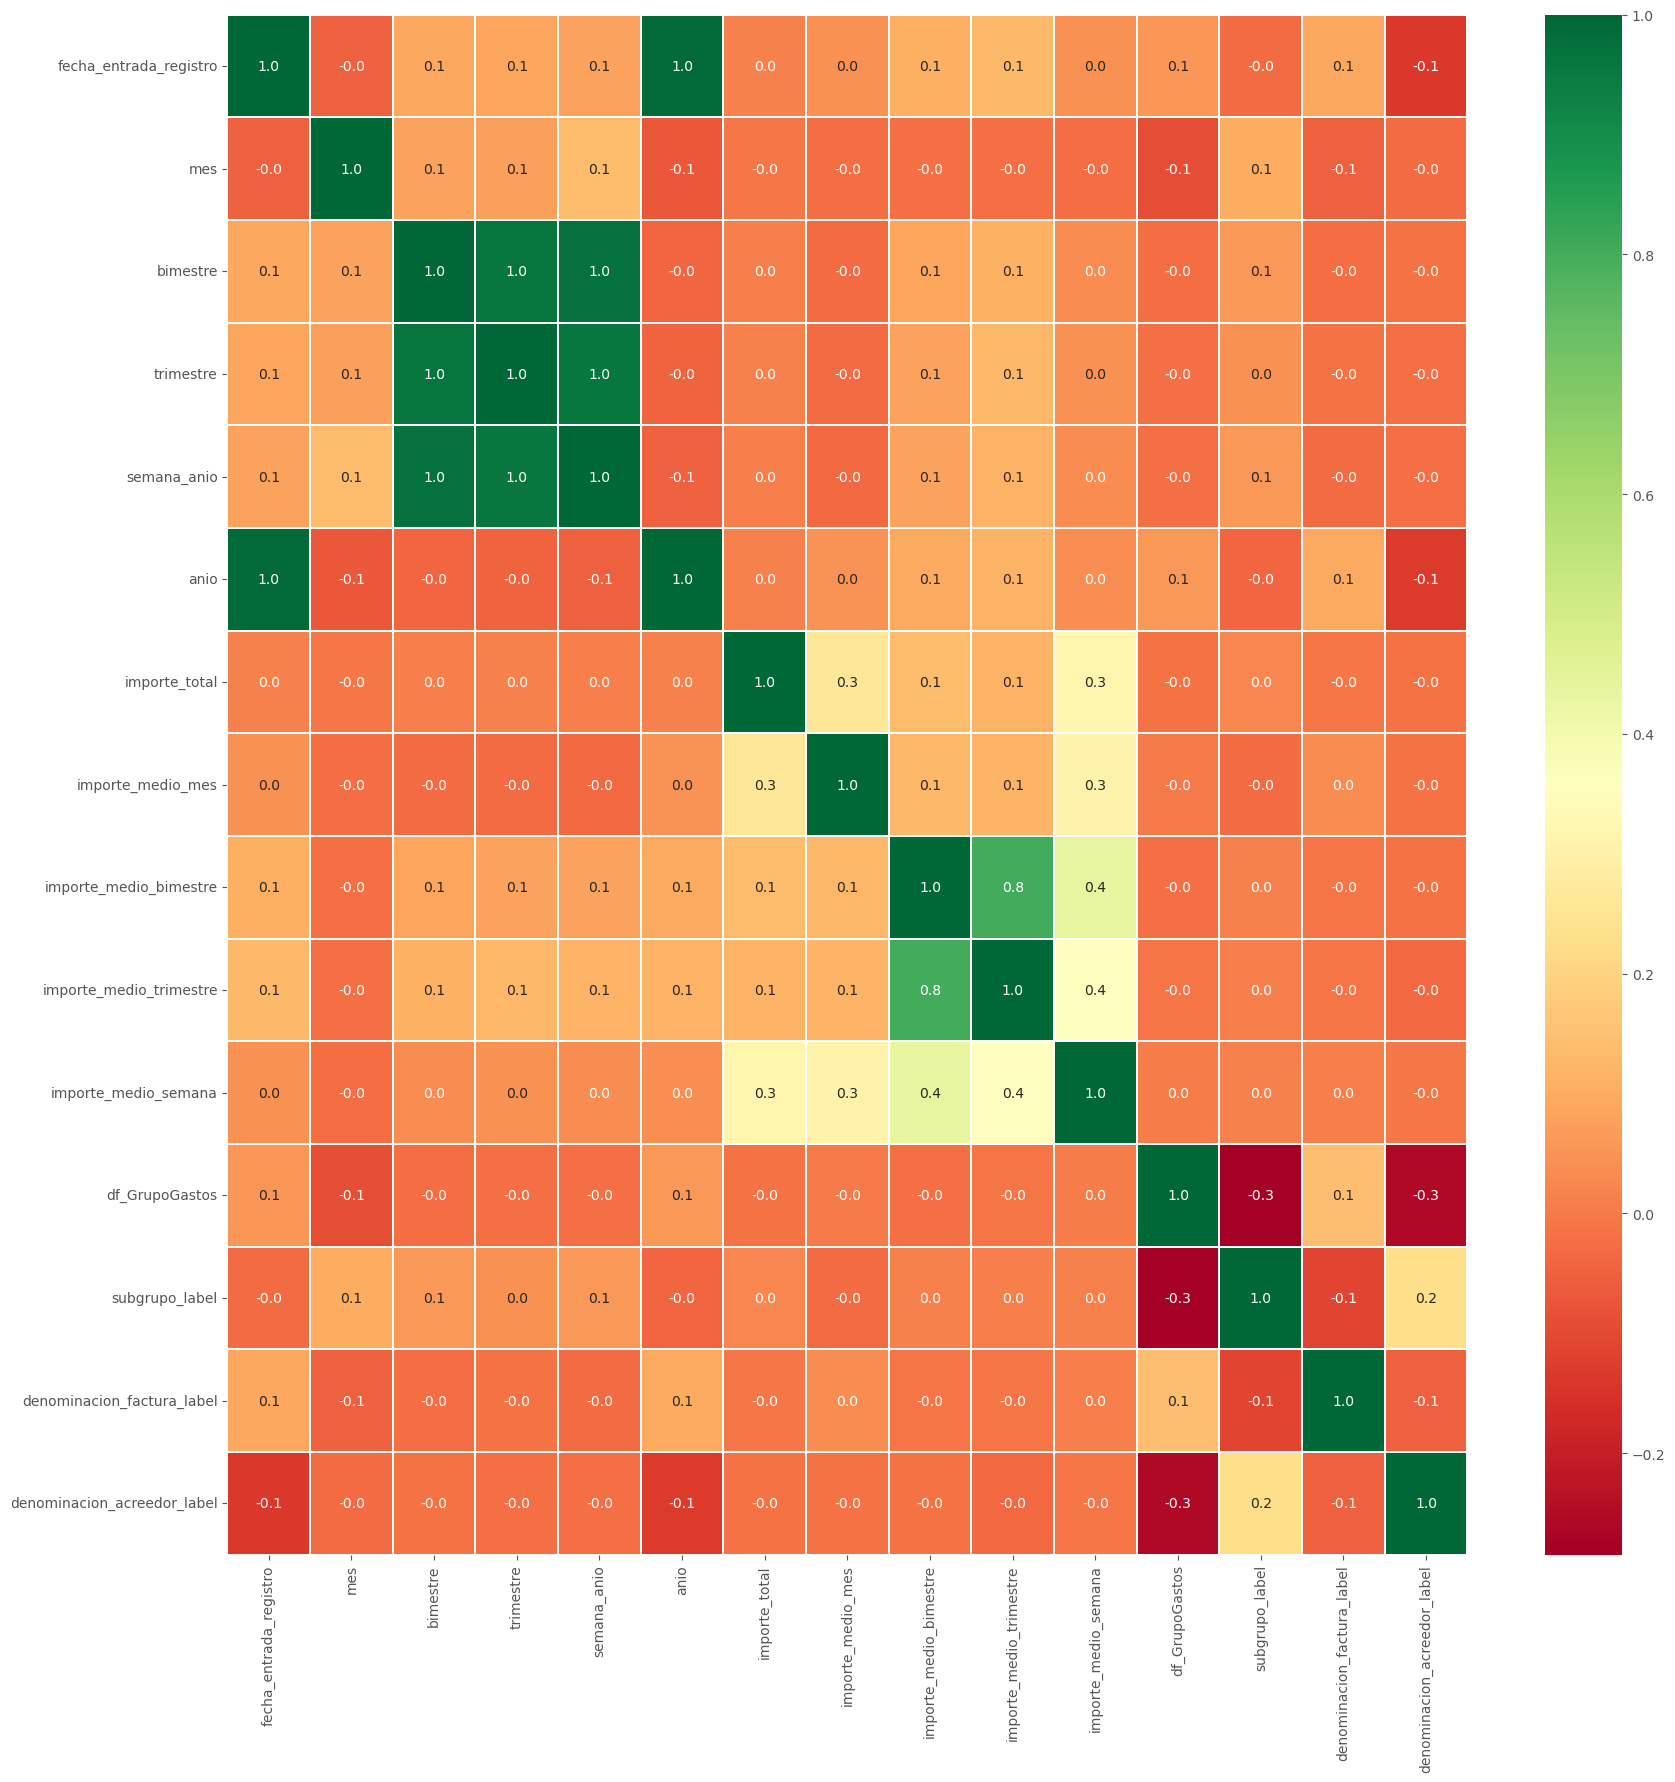

In [83]:
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, linewidths=.30, fmt= '.1f',cmap= 'RdYlGn', ax=ax)

Dataset con grupo de gastos como target

In [86]:
df_gastos= df.drop(columns = ['subgrupo_label'])


In [79]:
df_gastos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   fecha_entrada_registro       2704 non-null   datetime64[ns]
 1   mes                          2704 non-null   int64         
 2   bimestre                     2704 non-null   int32         
 3   trimestre                    2704 non-null   int32         
 4   semana_anio                  2704 non-null   UInt32        
 5   anio                         2704 non-null   int32         
 6   importe_total                2704 non-null   float64       
 7   importe_medio_mes            2704 non-null   float64       
 8   importe_medio_bimestre       2704 non-null   float64       
 9   importe_medio_trimestre      2704 non-null   float64       
 10  importe_medio_semana         2704 non-null   float64       
 11  df_GrupoGastos               2704 non-null 

In [88]:
corr_matrix =df_gastos.corr().abs()
corr_matrix

,fecha_entrada_registro,mes,bimestre,trimestre,semana_anio,anio,importe_total,importe_medio_mes,importe_medio_bimestre,importe_medio_trimestre,importe_medio_semana,df_GrupoGastos,denominacion_factura_label,denominacion_acreedor_label
fecha_entrada_registro,1.000000,0.049551,0.088252,0.083026,0.077682,0.991111,0.014115,0.043757,0.104498,0.127484,0.044972,0.053383,0.088768,0.134543
mes,0.049551,1.000000,0.078534,0.075254,0.136798,0.070134,0.007010,0.027123,0.018663,0.019396,0.028250,0.091411,0.050833,0.032385
bimestre,0.088252,0.078534,1.000000,0.963083,0.973942,0.043397,0.011210,0.032276,0.082673,0.110916,0.035920,0.024435,0.025054,0.014224
trimestre,0.083026,0.075254,0.963083,1.000000,0.957906,0.046293,0.013771,0.028830,0.079442,0.121946,0.044103,0.020137,0.018108,0.021790
semana_anio,0.077682,0.136798,0.973942,0.957906,1.000000,0.053531,0.011059,0.037141,0.078587,0.112906,0.035376,0.018732,0.030712,0.023297
anio,0.991111,0.070134,0.043397,0.046293,0.053531,1.000000,0.012673,0.049037,0.093460,0.112222,0.040539,0.056814,0.092803,0.131898
importe_total,0.014115,0.007010,0.011210,0.013771,0.011059,0.012673,1.000000,0.258431,0.135595,0.112925,0.312606,0.018513,0.006391,0.015424
importe_medio_mes,0.043757,0.027123,0.032276,0.028830,0.037141,0.049037,0.258431,1.000000,0.124041,0.112163,0.311564,0.001674,0.032599,0.013925
importe_medio_bimestre,0.104498,0.018663,0.082673,0.079442,0.078587,0.093460,0.135595,0.124041,1.000000,0.803477,0.434338,0.022617,0.011858,0.018439
importe_medio_trimestre,0.127484,0.019396,0.110916,0.121946,0.112906,0.112222,0.112925,0.112163,0.803477,1.000000,0.361399,0.009432,0.012219,0.033649


<Axes: >

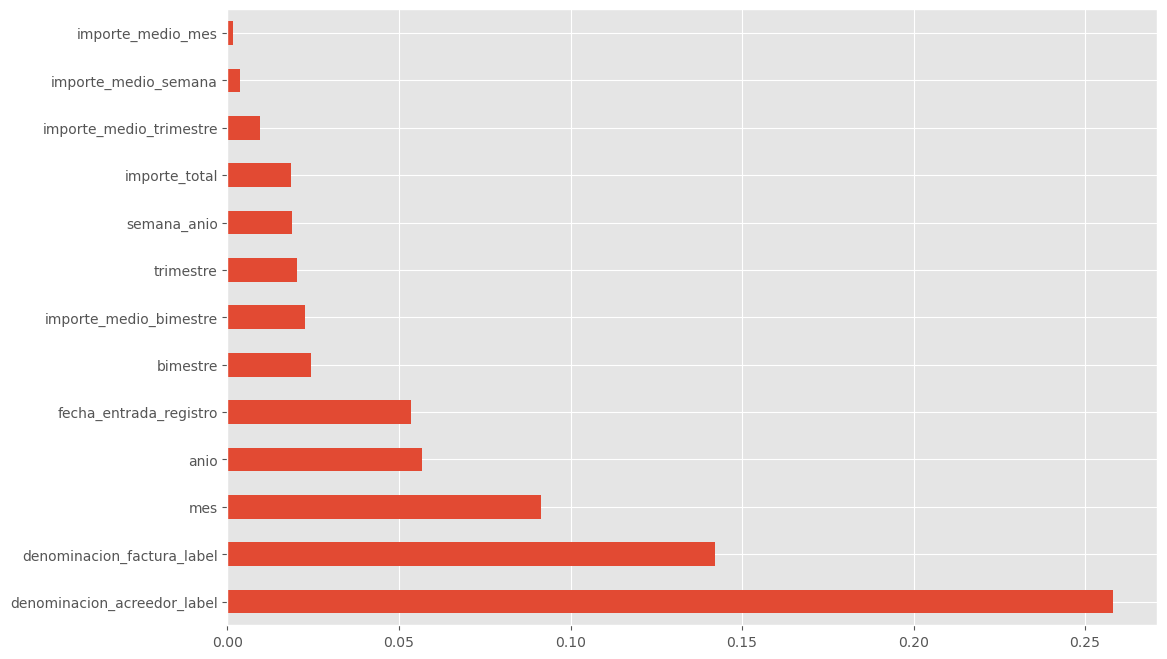

In [92]:
(corr_matrix
     .df_GrupoGastos
     .drop('df_GrupoGastos')
     .sort_values(ascending=False)
     .plot
     .barh())

In [99]:
df_gastos_target

['df_GrupoGastos']

In [101]:
df_gastos_target = df_gastos['df_GrupoGastos']
df_gastos_sintarget = df_gastos.drop(columns = ['df_GrupoGastos','fecha_entrada_registro'])
df_gastos_sintarget_norm = MinMaxScaler().fit_transform(df_gastos_sintarget)
print(df_gastos_target.shape)
print(df_gastos_sintarget.shape)

(2704,)
(2704, 12)


Variance Threshold¶
A continuación, vamos a utilizar el selector VarianceThreshold, selecciona variables para eliminar de la selección, por defecto lo que hace es eliminar las variables con baja varianza.

In [134]:
variables = []
selector = VarianceThreshold(threshold=0.05)
np.shape(selector.fit_transform(df_gastos_sintarget_norm))
variables.append(list(np.array(df_gastos_sintarget.columns)[selector.get_support(indices=False)]))
variables

[['mes',
  'bimestre',
  'trimestre',
  'semana_anio',
  'anio',
  'denominacion_factura_label',
  'denominacion_acreedor_label']]

La función SelectfromModel nos permite definir un estimador para seleccionar variables que puedan resultar importantes. En función de los modelos que se prueben se puede ver su importancia a partir de un peso.

In [137]:
var = []

In [139]:
 lasso = MultiTaskLassoCV(cv=3).fit(df_gastos_sintarget_norm, df_gastos_sintarget)
modelo = SelectFromModel(lasso, prefit=True)
X = modelo.transform(df_gastos_sintarget_norm)
X_df = pd.DataFrame(X, columns=[df_gastos_sintarget.columns[i] for i in range(len(df_gastos_sintarget.columns)) if modelo.get_support()[i]])
var.append(X_df.columns.tolist())

In [140]:
var

[['mes',
  'bimestre',
  'trimestre',
  'importe_total',
  'importe_medio_mes',
  'importe_medio_bimestre',
  'importe_medio_trimestre',
  'importe_medio_semana',
  'denominacion_factura_label',
  'denominacion_acreedor_label']]

Selección Univariable - SelectKBest
Scikit-learn tiene una clase que puede ser utilizada con una variedad de test estadísticos para seleccionar una cantidad específica de variables.

Se pueden ajustar los parámetros de score_func (el test a utilizar) y k (cantidad de clases)

CHI2

In [160]:
stat_test_var = []

In [164]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(df_gastos_sintarget_norm, df_gastos_target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_gastos_sintarget.columns)


# Visualizamos el score de cada feature en una columna 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
# Almacenamos las mejores 10 en función del score asignado
stat_test_var.append(featureScores.nlargest(10,'Score')['Feature'].tolist())
print(featureScores.nlargest(len(dfcolumns),'Score')) 

                        Feature       Score
11  denominacion_acreedor_label  111.244107
4                          anio   54.555237
10   denominacion_factura_label   45.239237
0                           mes   22.503808
1                      bimestre    3.976081
3                   semana_anio    3.437779
2                     trimestre    3.336207
7        importe_medio_bimestre    0.286387
8       importe_medio_trimestre    0.210098
9          importe_medio_semana    0.094602
6             importe_medio_mes    0.074538
5                 importe_total    0.071959


In [166]:
stat_test_var

[['denominacion_acreedor_label',
  'anio',
  'denominacion_factura_label',
  'mes',
  'bimestre',
  'semana_anio',
  'trimestre',
  'importe_medio_bimestre',
  'importe_medio_trimestre',
  'importe_medio_semana']]

##### Annova

In [170]:
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(df_gastos_sintarget_norm, df_gastos_target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_gastos_sintarget.columns)

# Visualizamos el score de cada feature en una columna 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']
# Almacenamos las mejores 10 en función del score asignado
stat_test_var.append(featureScores.nlargest(10,'Score')['Feature'].tolist())
print(featureScores.nlargest(len(dfcolumns),'Score')) 

                        Feature       Score
11  denominacion_acreedor_label  186.498400
10   denominacion_factura_label   49.537105
4                          anio   48.102861
0                           mes   18.912796
3                   semana_anio    3.513328
1                      bimestre    3.148608
5                 importe_total    2.718959
2                     trimestre    2.216611
9          importe_medio_semana    1.184821
7        importe_medio_bimestre    0.794055
6             importe_medio_mes    0.503134
8       importe_medio_trimestre    0.250661


In [172]:
stat_test_var

[['denominacion_acreedor_label',
  'anio',
  'denominacion_factura_label',
  'mes',
  'bimestre',
  'semana_anio',
  'trimestre',
  'importe_medio_bimestre',
  'importe_medio_trimestre',
  'importe_medio_semana'],
 ['denominacion_acreedor_label',
  'denominacion_factura_label',
  'anio',
  'mes',
  'semana_anio',
  'bimestre',
  'importe_total',
  'trimestre',
  'importe_medio_semana',
  'importe_medio_bimestre']]

#### Eliminación de variables recursivas


Dentro de sklearn podemos encontrar una función(recursive feature) , sirve para asignar pesos a las variables. La función RFE selecciona recursivamente un conjunto de variables acotandolo cada vez más

In [146]:
rfe_var = []

RFE Regresión Logística

In [149]:
rfe_select = RFE(estimator=LogisticRegression(), n_features_to_select=5, step=2, verbose=2)
rfe_select.fit(df_gastos_sintarget_norm, df_gastos_target)
rfe_support = rfe_select.get_support()
rfe_feature = df_gastos_sintarget.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
rfe_var.append(rfe_feature)

Fitting estimator with 12 features.
Fitting estimator with 10 features.
Fitting estimator with 8 features.
Fitting estimator with 6 features.
5 selected features


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

RFE Random Forest

In [152]:
rfe_selector = RFE(estimator=RandomForestClassifier(n_estimators=200), n_features_to_select=10, step=2, verbose=2)
rfe_select.fit(df_gastos_sintarget_norm, df_gastos_target)
rfe_support = rfe_select.get_support()
rfe_feature =  df_gastos_sintarget.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
rfe_var.append(rfe_feature)

Fitting estimator with 12 features.
Fitting estimator with 10 features.
Fitting estimator with 8 features.
Fitting estimator with 6 features.
5 selected features


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Veremos que variables se encuentran en ambos casos.

In [155]:
main_cols_min = rfe_var[0]
for i in range(len(rfe_var)-1):
    main_cols_min = list(set(main_cols_min).intersection(set(rfe_var[i+1])))
main_cols_min

['semana_anio',
 'mes',
 'anio',
 'denominacion_factura_label',
 'denominacion_acreedor_label']

A partir de los análisis de selección de variables realizados, se eligen las mejores variables para probar en modelos.

In [174]:
best_var = []
best_var.append(variables[0])
best_var.append(var[0])
best_var.append(stat_test_var[0])
best_var.append(stat_test_var[1])
best_var.append(rfe_var[0])
best_var.append(rfe_var[1])


main_cols_max = best_var[0]
for i in range(len(best_var)-1):
    main_cols_max = list(set(main_cols_max).union(set(best_var[i+1])))
print(main_cols_max)

main_cols_min = best_var[0]
for i in range(len(best_var)-1):
    main_cols_min = list(set(main_cols_min).intersection(set(best_var[i+1])))
print(main_cols_min)

['semana_anio', 'importe_total', 'anio', 'mes', 'importe_medio_trimestre', 'denominacion_factura_label', 'importe_medio_bimestre', 'importe_medio_semana', 'trimestre', 'bimestre', 'denominacion_acreedor_label', 'importe_medio_mes']
['denominacion_acreedor_label', 'denominacion_factura_label', 'mes']


In [176]:
print(len(main_cols_max))
print(len(main_cols_min))

12
3


In [180]:
# Ordenar las variables en función de la cantidad de veces que fueron seleccionadas por algún método
main_cols = []
main_cols_opt = {feature_name : 0 for feature_name in df_gastos.columns.tolist()}
for i in range(len(best_var)):
    for feature_name in best_var[i]:
        main_cols_opt[feature_name] += 1
df_main_cols_opt = pd.DataFrame.from_dict(main_cols_opt, orient='index', columns=['Num'])
df_main_cols_opt.sort_values(by=['Num'], ascending=False).head(19)

,Num
mes,6
denominacion_factura_label,6
denominacion_acreedor_label,6
semana_anio,5
anio,5
bimestre,4
trimestre,4
importe_medio_bimestre,3
importe_medio_semana,3
importe_total,2


Como vemos tenemos variables comunes en ambos estudios, y podemos seleccionar las variables en el dataset, nos quedaremos con las siguientes variables:

In [182]:
features=['mes','denominacion_factura_label','denominacion_acreedor_label','semana_anio','anio']

In [ ]:
df_final.info()

In [186]:
df_gastos = df[['df_GrupoGastos', 'mes','denominacion_factura_label','denominacion_acreedor_label','semana_anio','anio']]
df_subgrupo = df[['subgrupo_label', 'mes','denominacion_factura_label','denominacion_acreedor_label','semana_anio','anio']]


In [188]:
df_gastos.to_excel('df_gastos.xlsx', index=False)
df_subgrupo.to_excel('df_subgrupo.xlsx', index=False)

Como vemos tenemos variables comunes en ambos estudios, y podemos seleccionar las variables en el dataset, nos quedaremos con las siguientes variables:

In [ ]:
df_final.info()

In [ ]:
df_final_gruposub.info()

In [ ]:
df_features.info()